In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas_profiling import ProfileReport
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [7]:
%run ./Donnees.ipynb

In [8]:
%run ./EDA.ipynb

In [9]:
%run ./Featuring_engineering.ipynb

In [10]:
%run ./Modélisation.ipynb

In [11]:
%run ./Evaluation.ipynb

# Implémentez un modèle de scoring

**Problématique :** Classifier une demande de prêt comme risqué (1) ou non_risqué (0) et développer un modèle de scoring de la probabilité de défault de paiement du client

## Téléchargement Données 

In [12]:
Fichier = Donnees()

In [13]:
appli_test = Fichier.import_data('application_test.csv')

In [8]:
appli_train = Fichier.import_data('application_train.csv')
appli_test = Fichier.import_data('application_test.csv')
bureau = Fichier.import_data('bureau.csv')
bureau_balance = Fichier.import_data('bureau_balance.csv')
credit_card_balance= Fichier.import_data('credit_card_balance.csv')
installments_payments = Fichier.import_data('installments_payments.csv')
POS_CASH_balance = Fichier.import_data('POS_CASH_balance.csv')
previous_application = Fichier.import_data('previous_application.csv')
sample_submission = Fichier.import_data('sample_submission.csv')

In [10]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

## Exploratory Data Analysis

In [9]:
files_list = [appli_train, appli_test, bureau, bureau_balance, credit_card_balance, installments_payments,POS_CASH_balance, previous_application]

In [10]:
files_list_name = ['appli_train', 'appli_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments','POS_CASH_balance', 'previous_application']

In [11]:
eda = EDA()

In [12]:
shape_record = eda.shape(files_list,files_list_name)
shape_record

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train,307511.0,122.0,24.0
appli_test,48744.0,121.0,24.0
bureau,1716428.0,17.0,14.0
bureau_balance,27299925.0,3.0,0.0
credit_card_balance,3840312.0,23.0,7.0
installments_payments,13605401.0,8.0,0.0
POS_CASH_balance,10001358.0,8.0,0.0
previous_application,1670214.0,37.0,18.0


Il faudra regarder de plus près le pourcentage de valeurs manquantes des variables caractéristiques de appli_train et appli_test et savoir si on supprime les observations manuqantes ou si on applique une méthode d'imputation.

In [13]:
appli_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
10788,112561,0,Cash loans,F,N,Y,0,112500.0,1258650.0,52074.0,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009630,-17280,-254,-8000.0,-840,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,THURSDAY,9,0,0,0,0,1,1,Other,NaN,0.548114,0.551381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2452.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
40546,146958,0,Revolving loans,F,N,Y,0,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.020713,-18597,365243,-845.0,-2145,NaN,1,0,0,1,0,1,NaN,2.0,3,3,TUESDAY,7,0,0,0,0,0,0,XNA,NaN,0.372468,0.377404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1747.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
204673,337277,0,Cash loans,F,Y,Y,0,450000.0,1635795.0,108288.0,1579500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.018029,-16094,-2651,-4011.0,-4578,5.0,1,1,0,1,0,0,Managers,2.0,3,3,FRIDAY,12,0,0,0,0,1,1,Business Entity Type 3,0.755307,0.610134,0.689479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2174.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
242556,380767,0,Cash loans,F,N,Y,0,58500.0,140746.5,13842.0,121500.0,Unaccompanied,Pensioner,Secondary / secondary special,Wi

In [12]:
appli_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Analyse Univariée

In [14]:
target = 'TARGET'

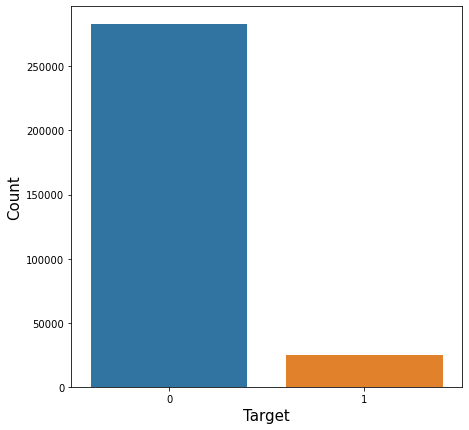

In [15]:
ax = eda.target_visualisation(appli_train,target)

La répartition des données est très déséquilibrée

In [16]:
num, categ = EDA().categ_numeric_features(appli_train)

appli_train: number of numeric variable is 106 and number of categoric variable is 16


In [17]:
len(categ)

16

In [18]:
categ

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype=object)

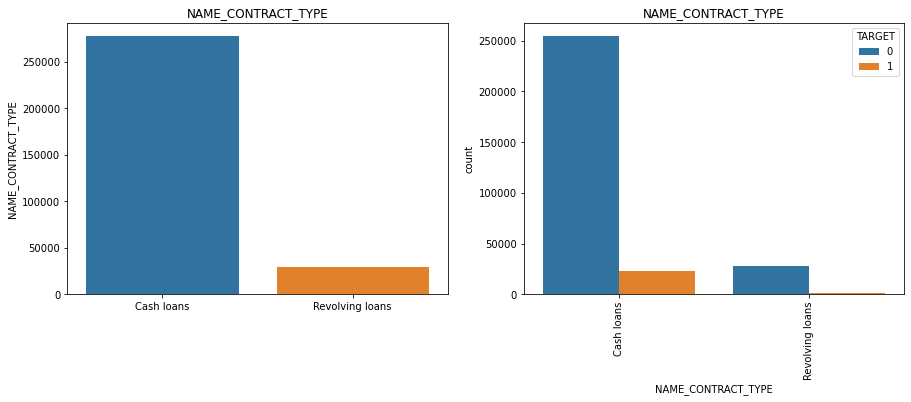

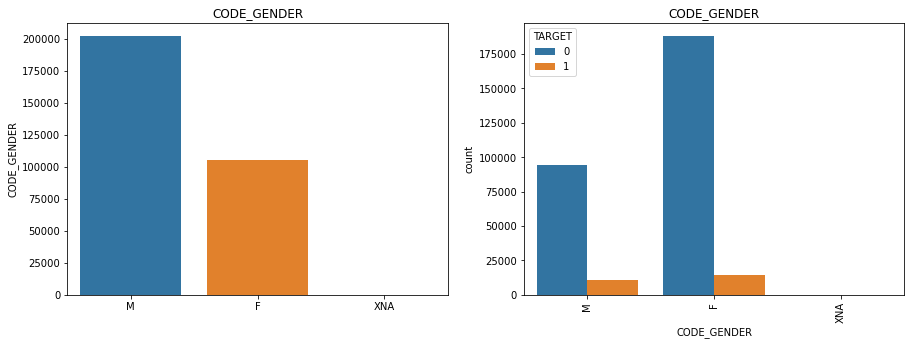

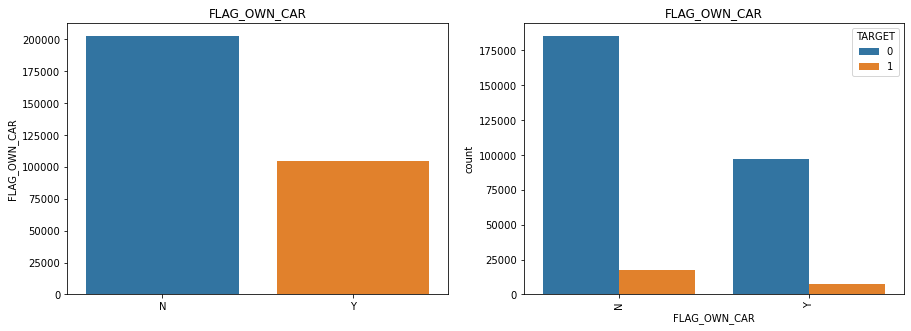

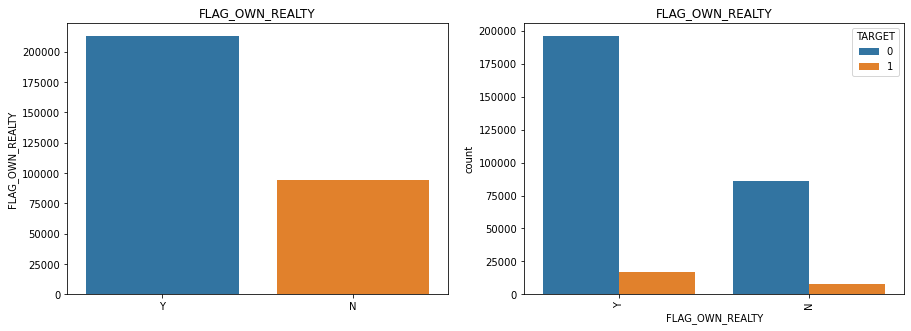

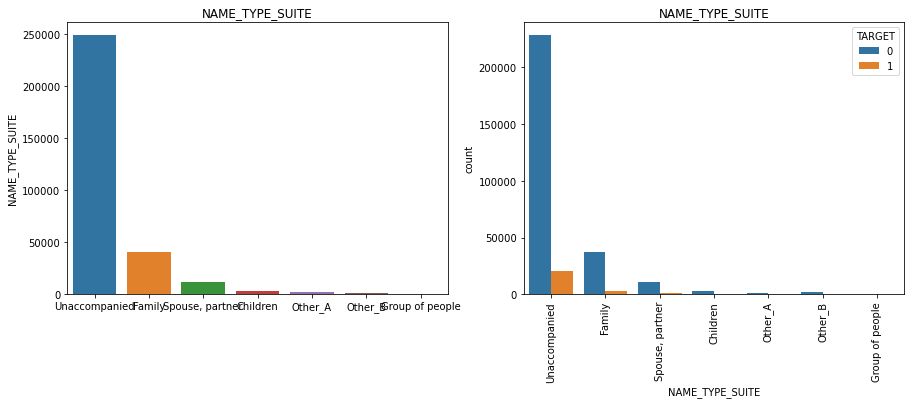

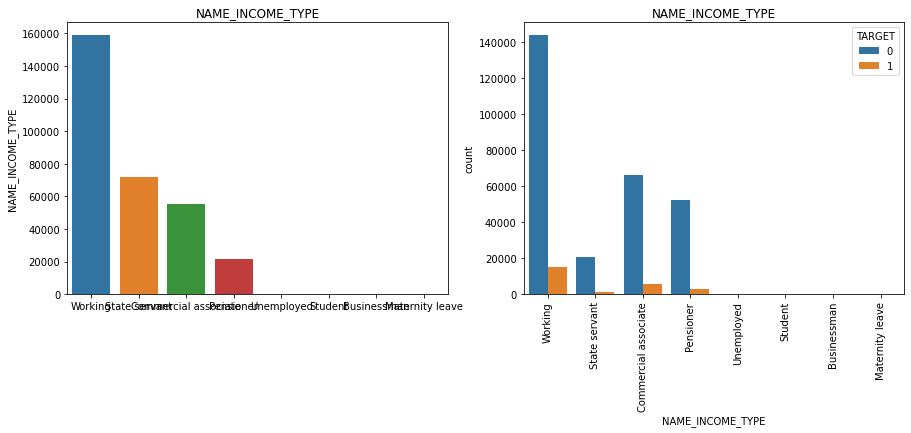

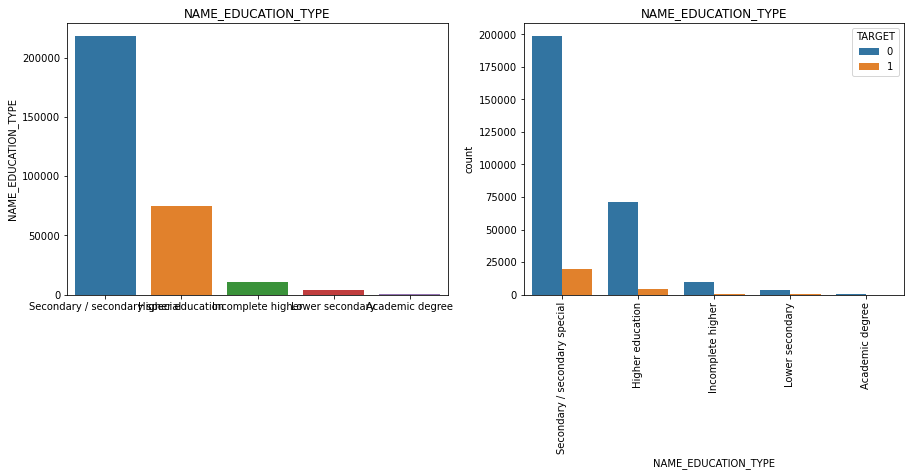

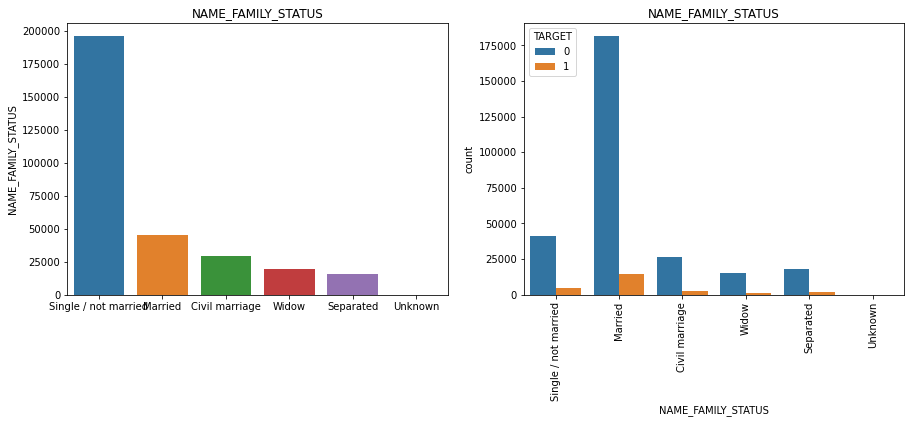

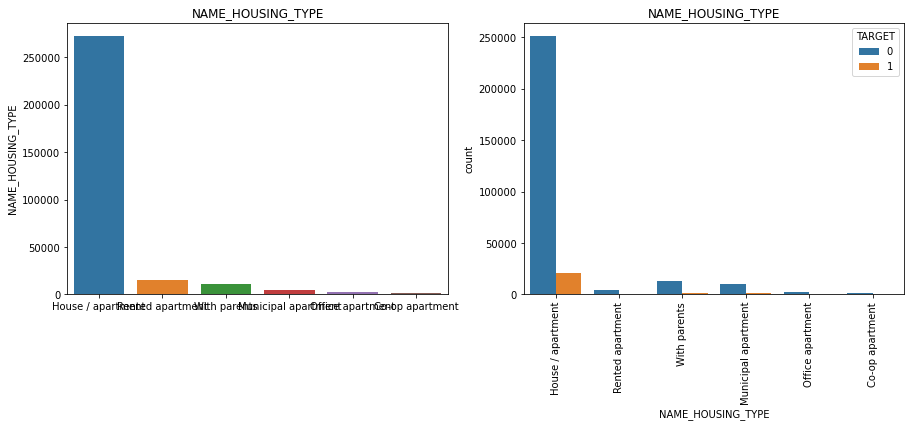

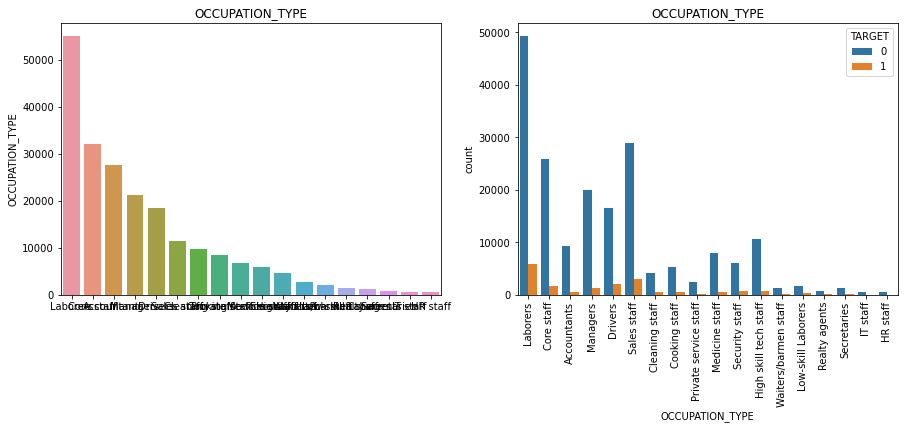

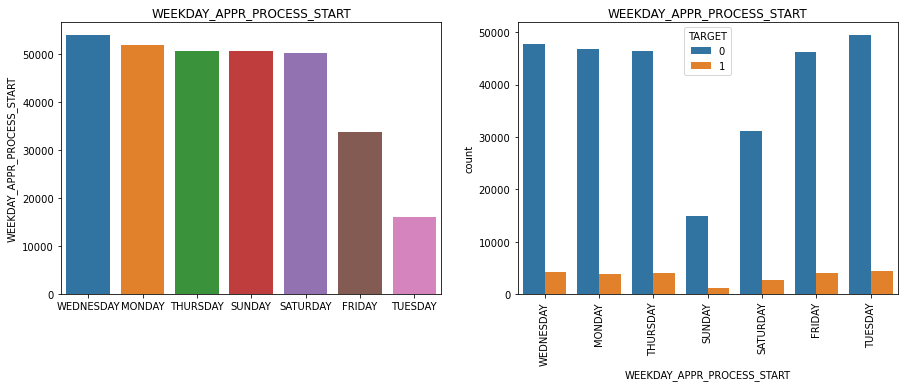

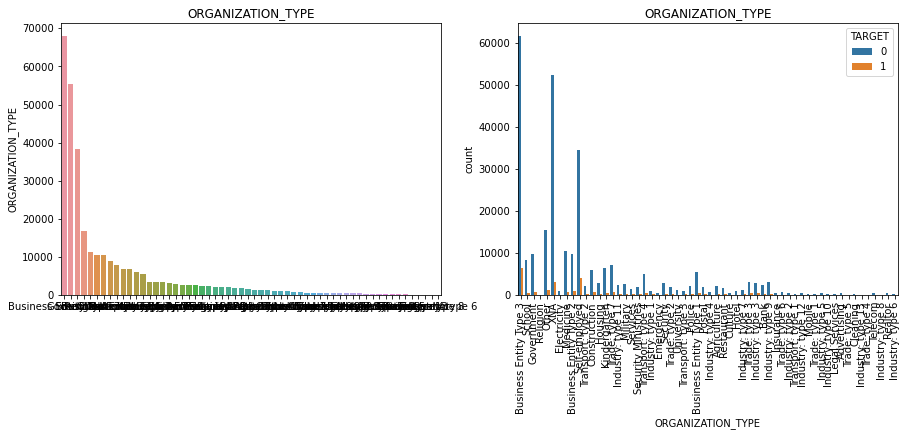

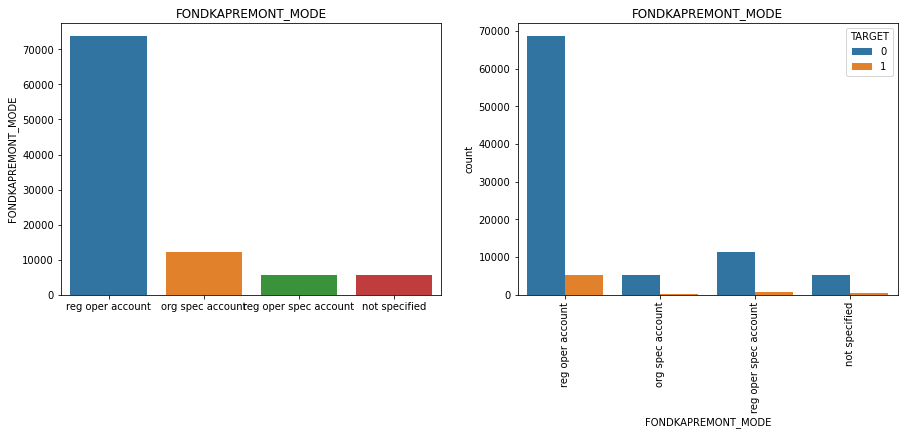

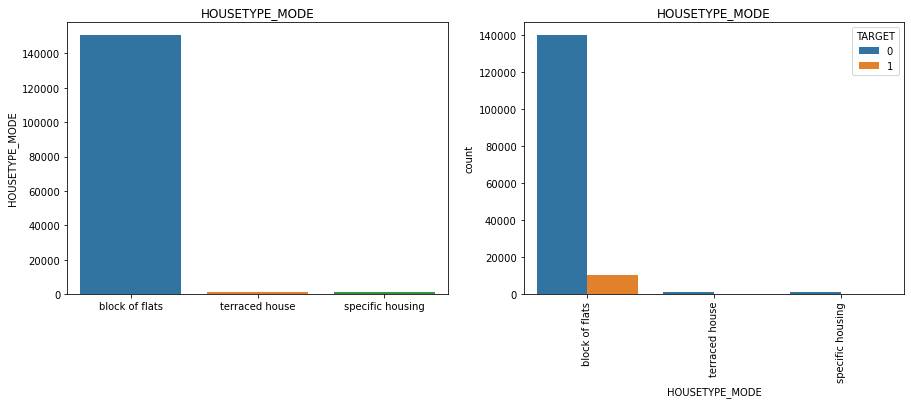

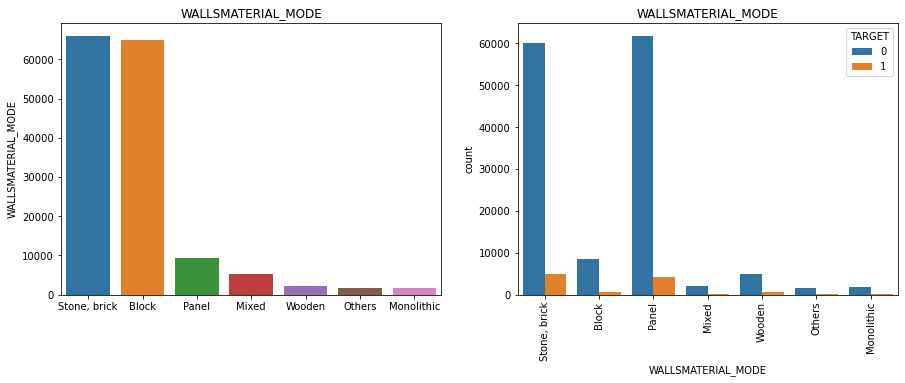

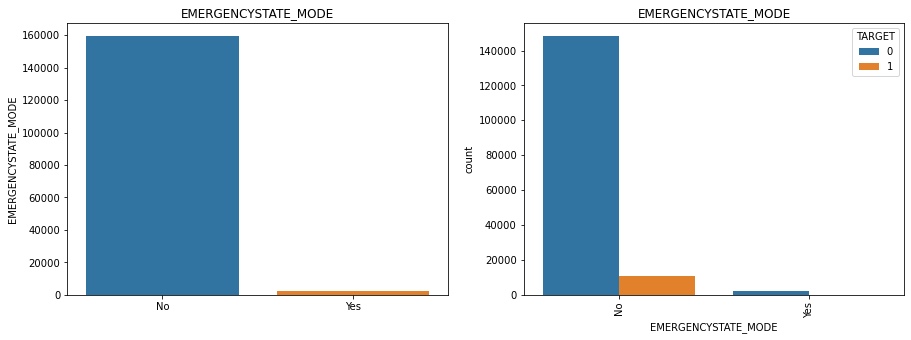

In [19]:
for i in range(len(categ)):
    ax = EDA().category_visualisation(appli_train,categ[i],1,2,'TARGET' )   

#### A finir
- **Name_contrat_type **
- Revolving loan : le crédit révolving est uncrédit sur un petit ou un gros projet. l'argent prêté peut être utilisé à l'infini tant que la carte est valide
- Cash loan :le crédit cach est un prêt efféctué pour une entreprise par la banque

On remarque que la grande majorité des crédit sont des crédit cash
- **code_gender**
Il y a plus de femmes que de hommes qui demandent des crédits. Je ne sais pas a quoi corresponde le genre XNA ? il n'y a personne dans cette catégorie, elle sera supprimé

- **FLAG_OWN_CAR**
Il y a plus de personnes sans voiture qu'avec voiture
- **FLAG_OWN_REALTY** (est ce que la personne a sa propre maison ou appartement)
La plupart sont propriétaires d'une maison ou d'un appartement
- **NAME_TYPE_SUITE** (qui accompagné le client pendant l'octroi du prêt)
Variable à supprimer probablement
- **Name_INCOME_TYPE**
La catégorie la plus élevée est le working et le commercial associate, supprimer Unemployed, student, businessman et maternity leave???

- **NAME_EDUCATION_TYPE**
La plupart sont dans la catégorie secondary special ???
Aucun ne vient d'Academic degree ( a supprimer ?)

- **NAME_Family_STATUS**
La plupart sont mariée et il y a une catégorie vide 'unknown" (a supprimer?)

- **NAME_HOUSING_TYPE**
La plupart sont dans des maison ou appartement

- **OCCUPATION_TYPE**
Une grande majorité sont des ouvriers, des chargé de ventes, des personnels de base, des conducteurs, des managers

In [20]:
appli_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

On se rend compte qu'il y a des informations à vérifier: 
- maximum du nombre d'enfants 19 (A vérifier si outliers ou non)
- AMT_CREDIT  et AMT_GOODS_PRICE ont presque les même statistiques (voir si c'est pas trop corrélés)
- 

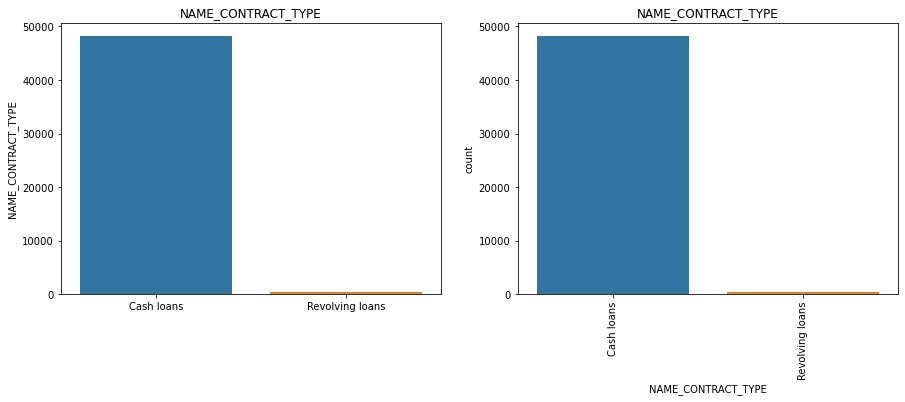

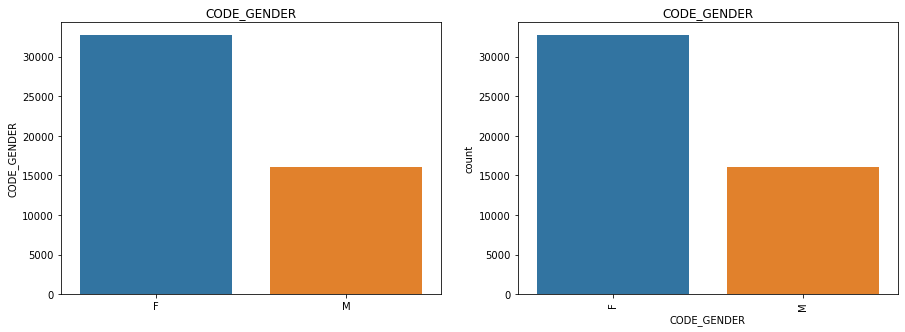

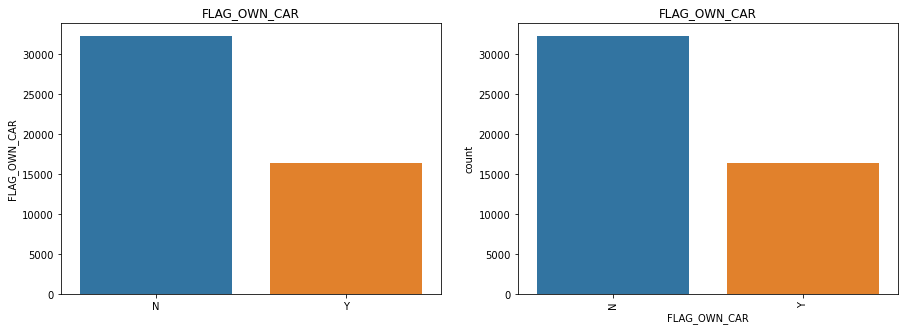

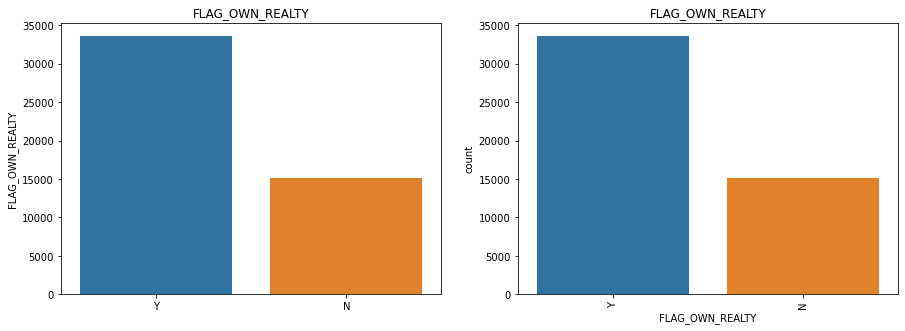

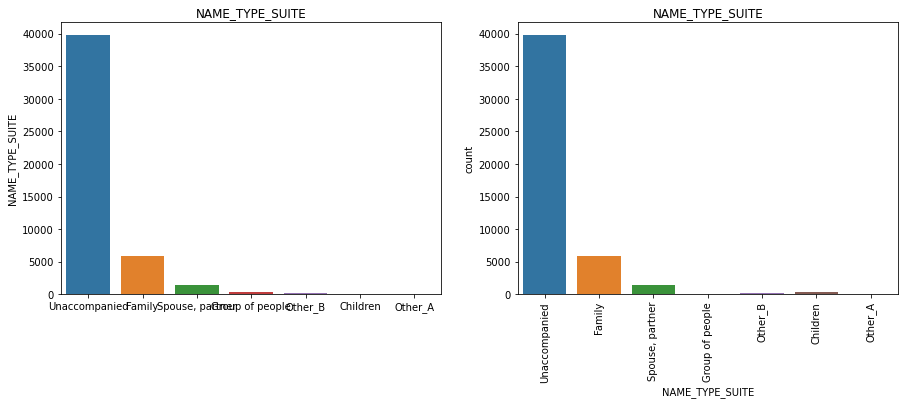

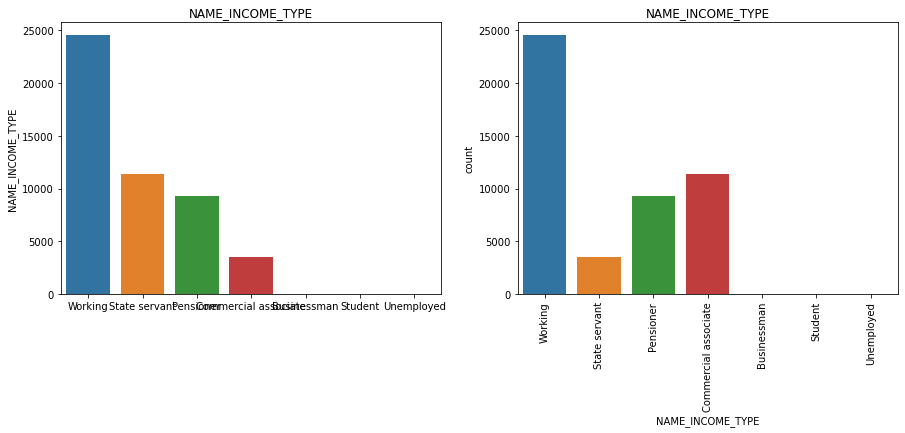

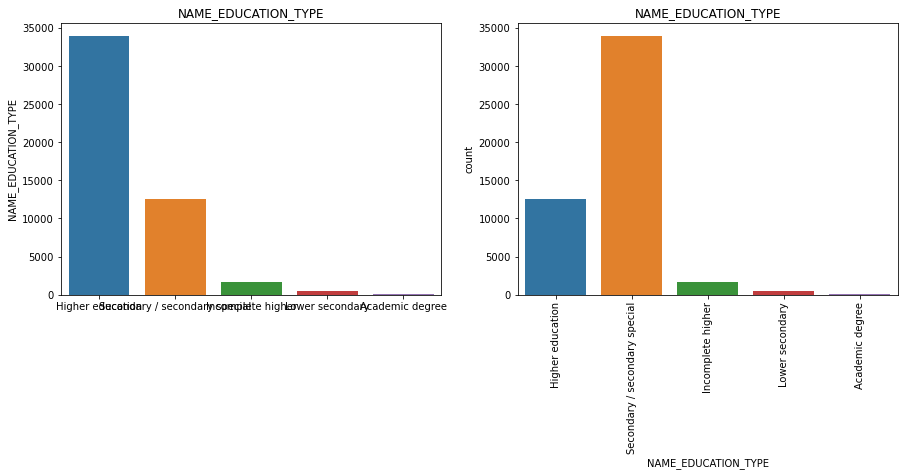

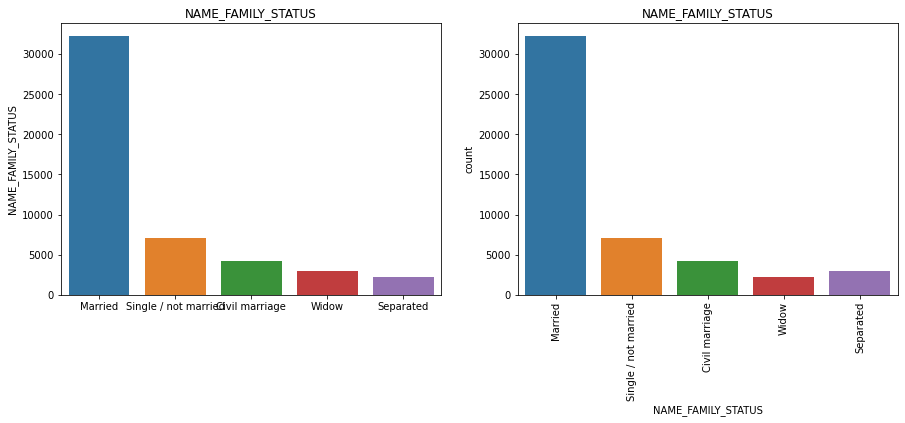

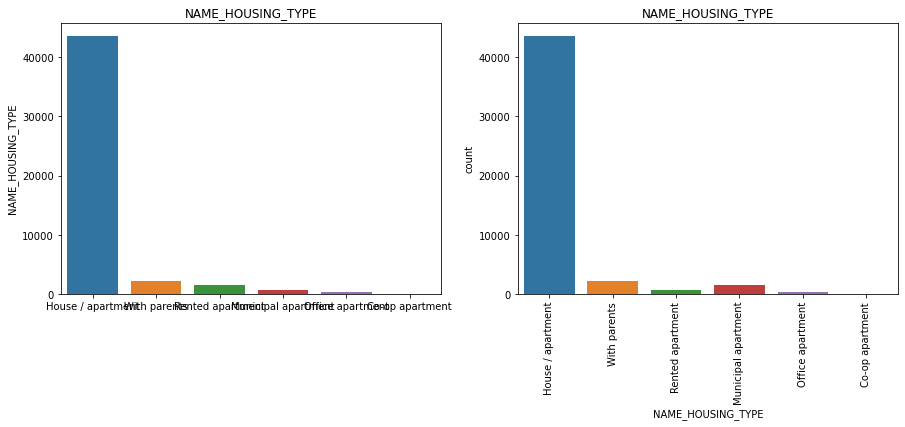

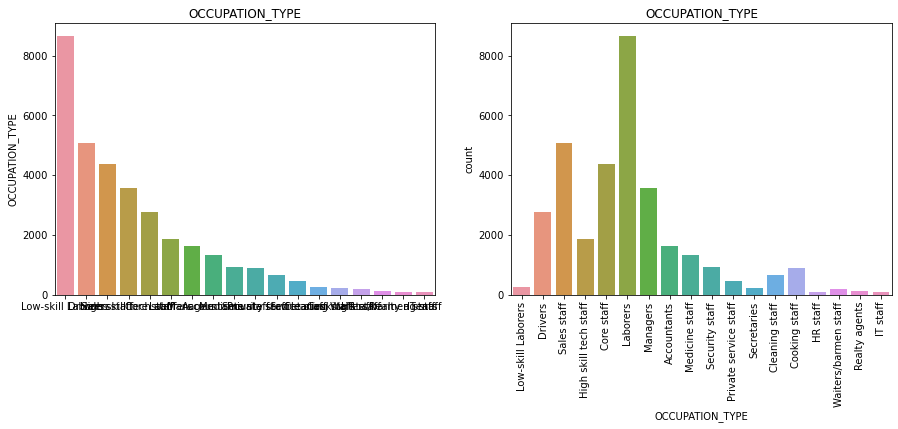

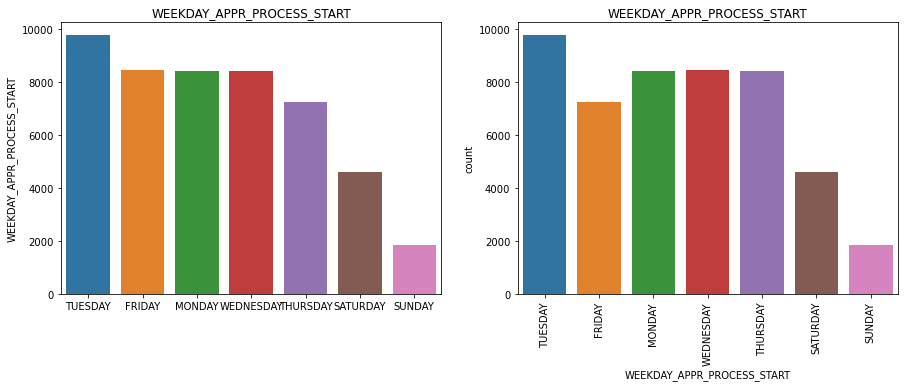

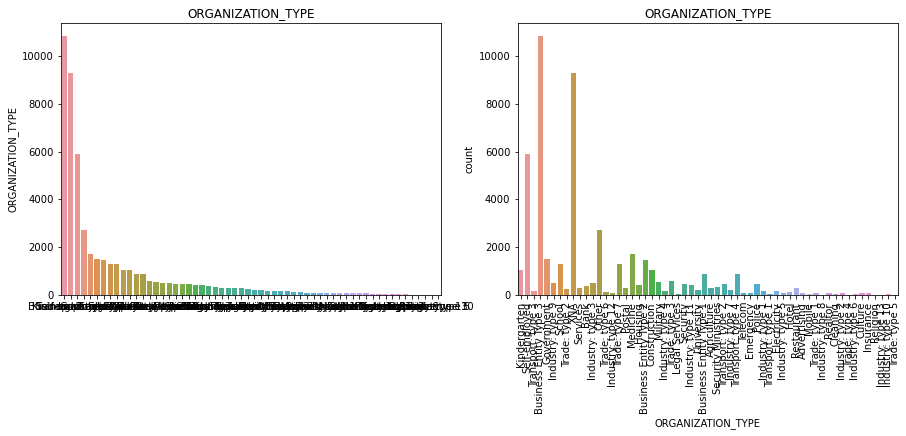

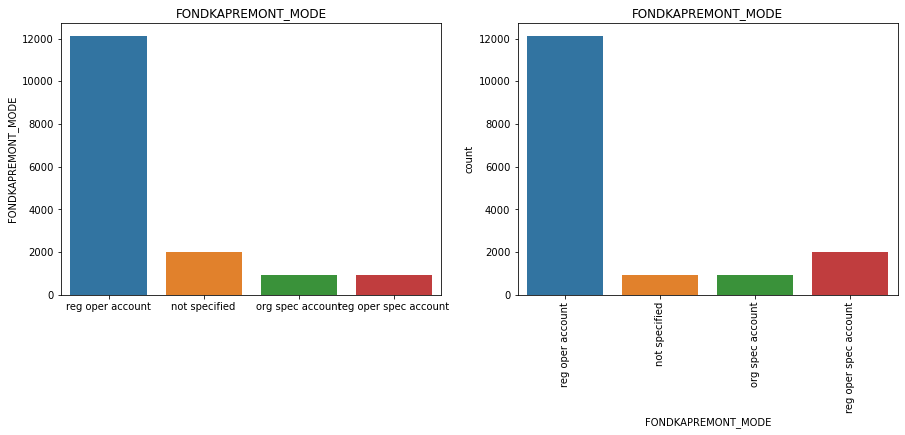

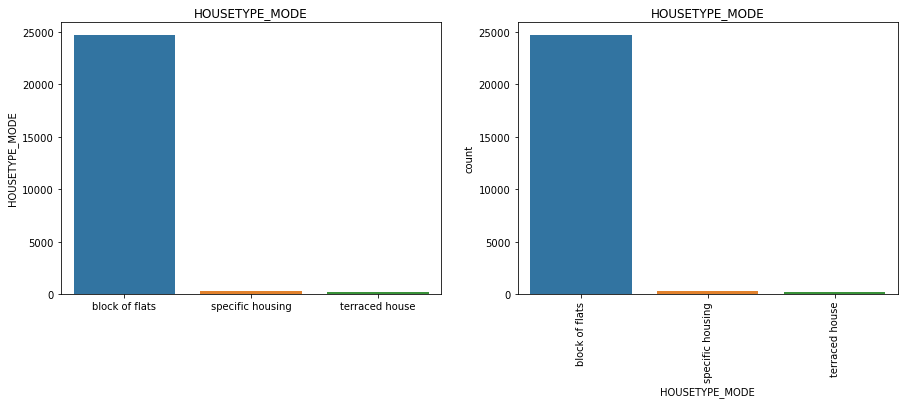

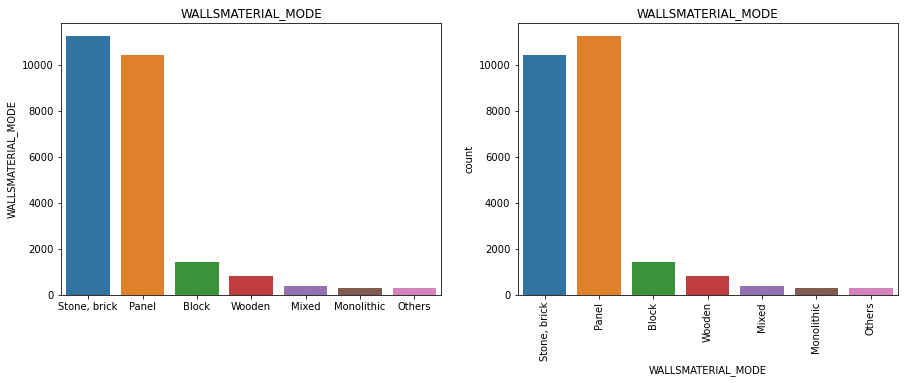

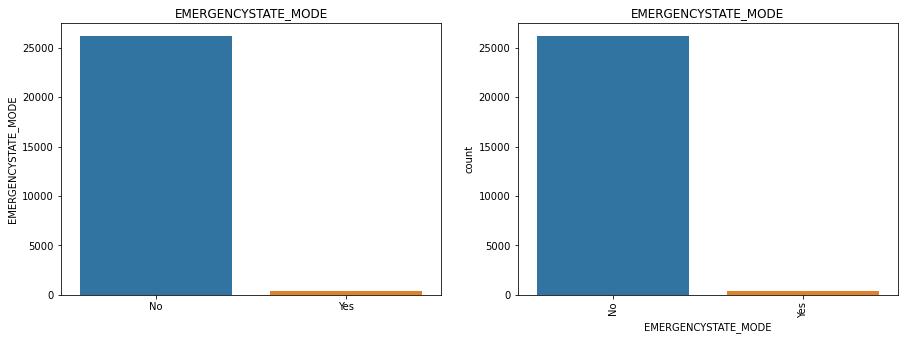

In [82]:
for i in range(len(categ)):
    ax = EDA().category_visualisation(appli_test,categ[i],1,2,None)

In [21]:
num

array(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPAR

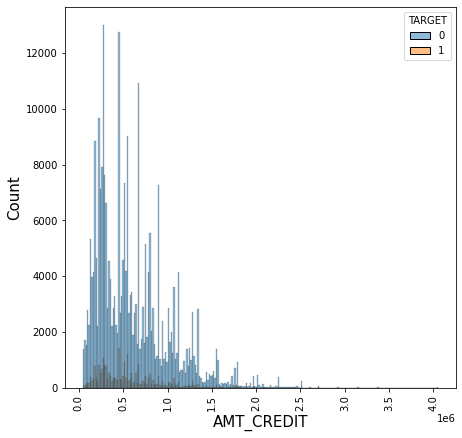

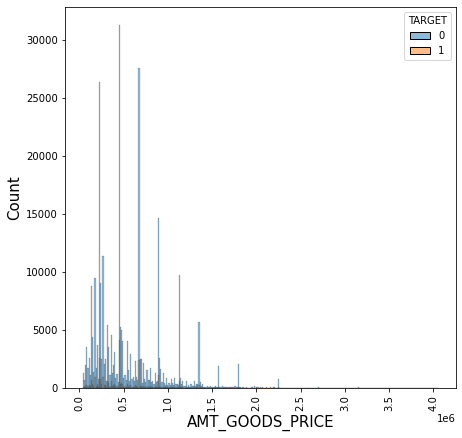

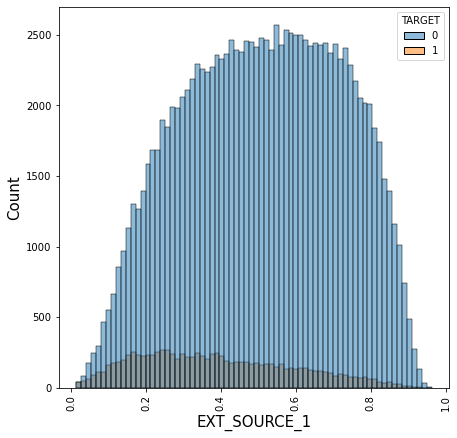

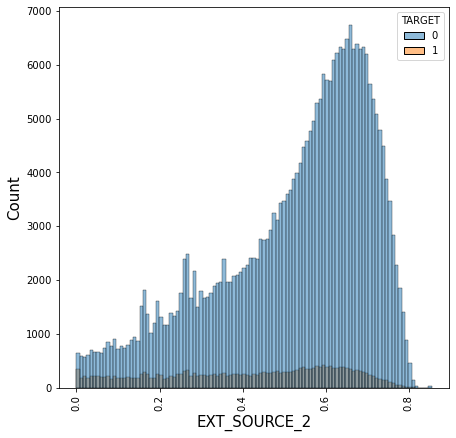

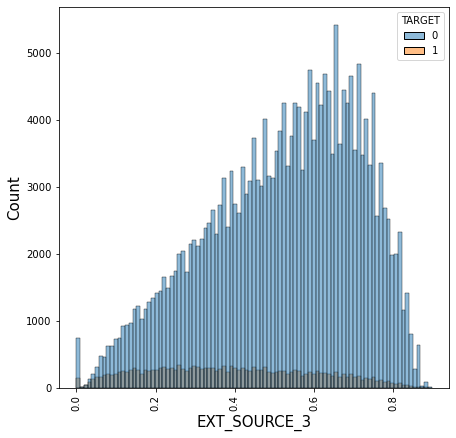

In [22]:
num_col = ['AMT_CREDIT', 'AMT_GOODS_PRICE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
for i in range(len(num_col)):
    axe3 = EDA().numeric_visualisation(appli_train, num_col[i], 'TARGET') 

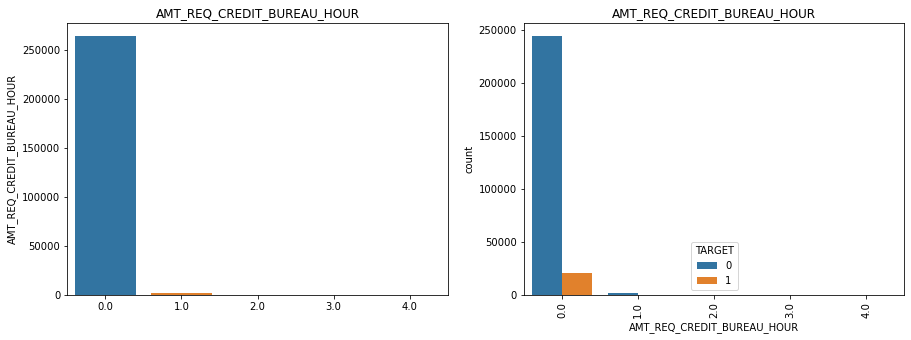

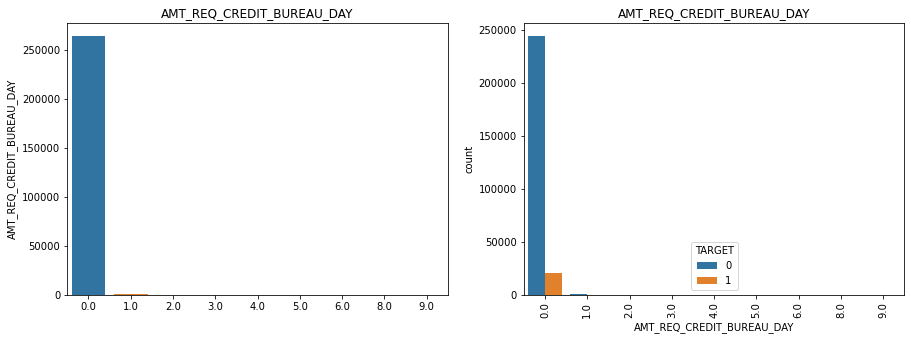

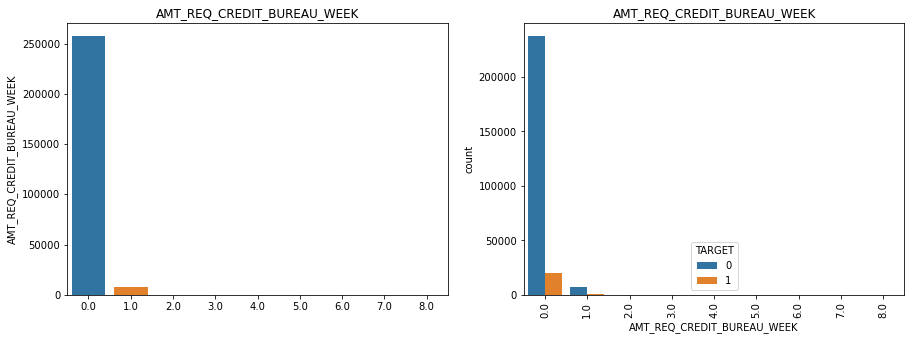

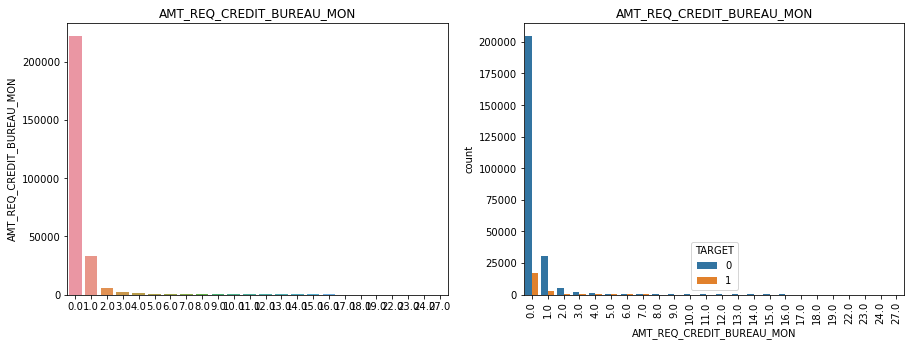

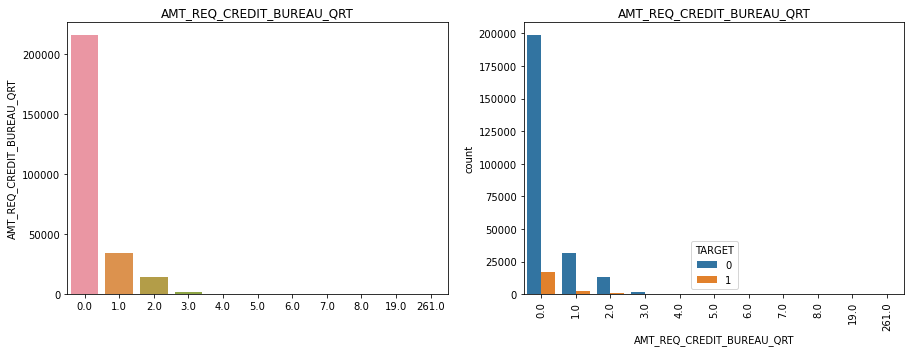

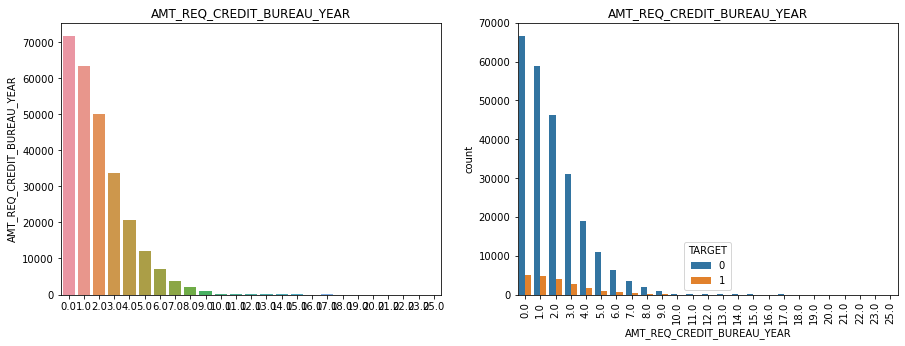

In [84]:
num_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in range(len(num_col)):
    ax = EDA().category_visualisation(appli_train,num_col[i],1,2,'TARGET' )   

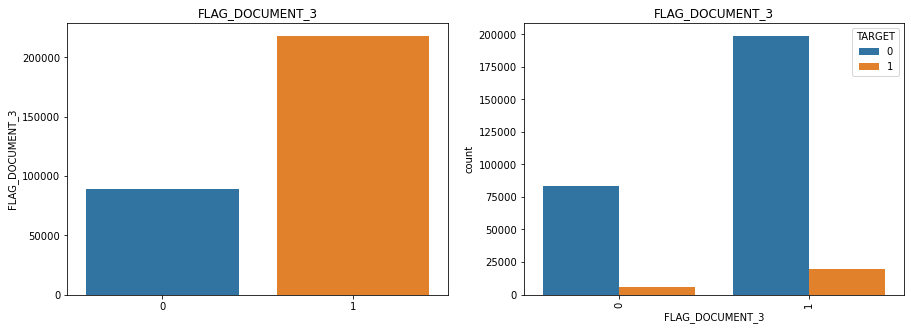

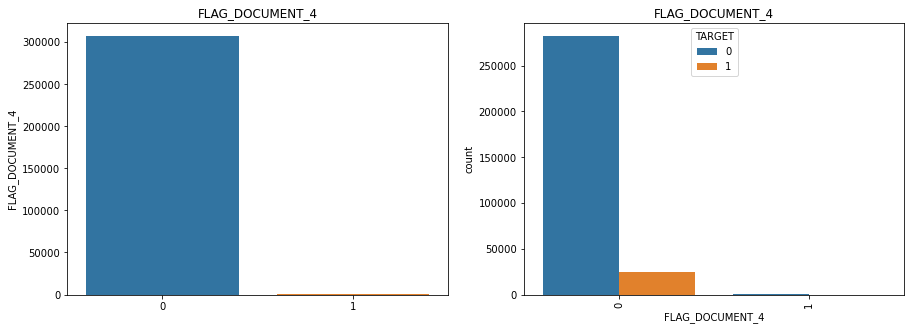

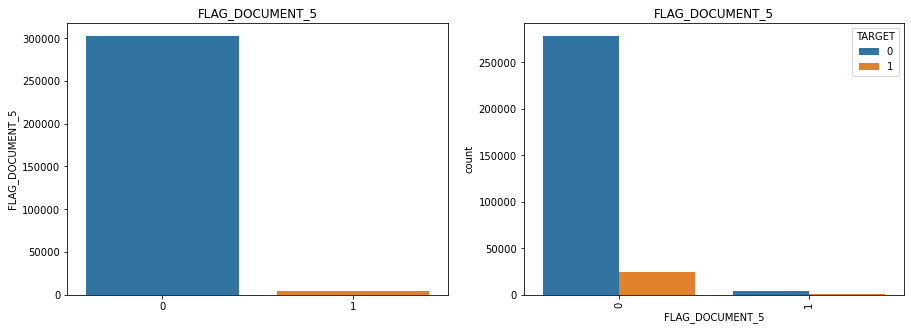

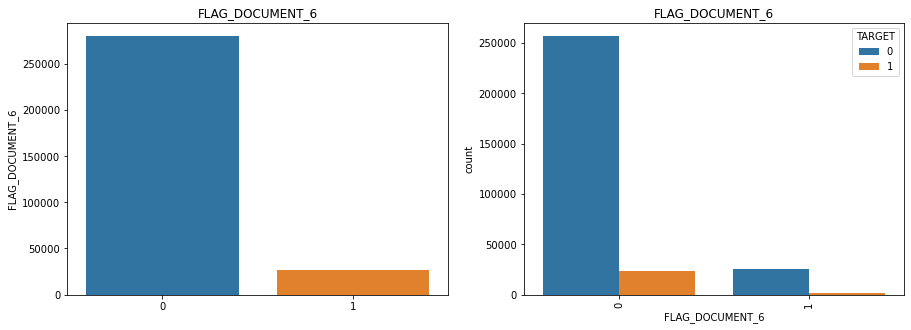

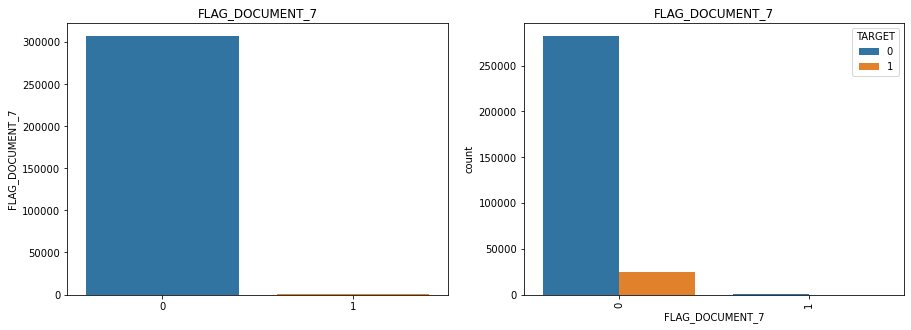

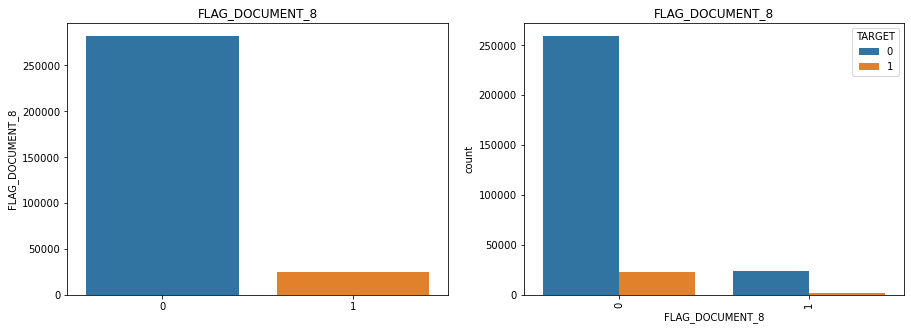

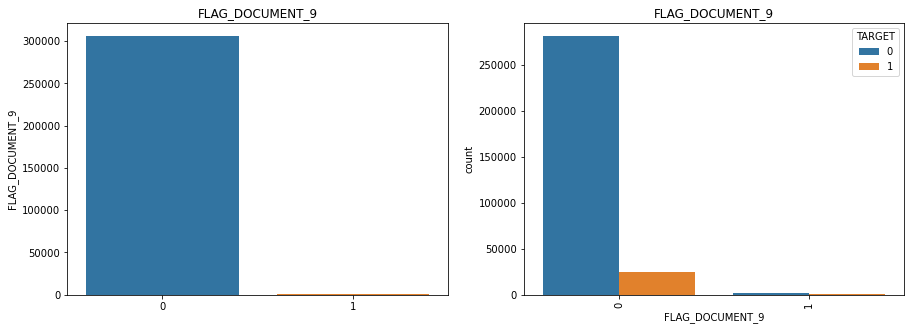

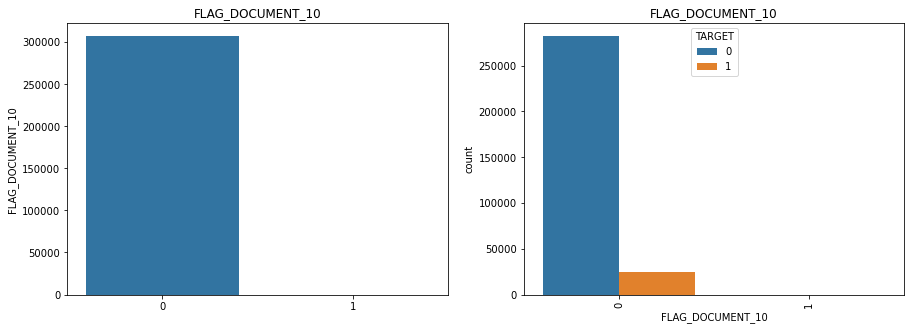

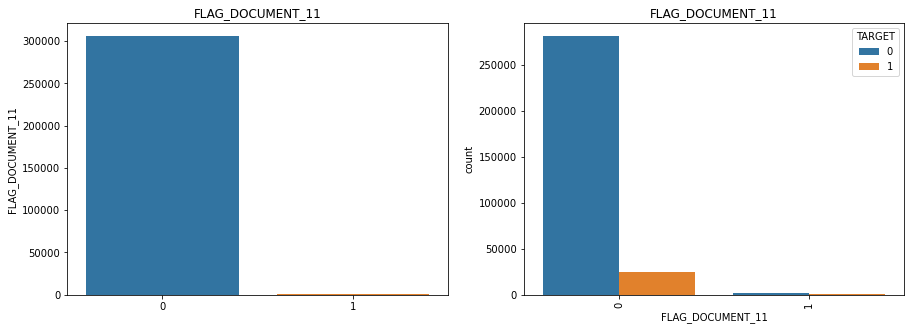

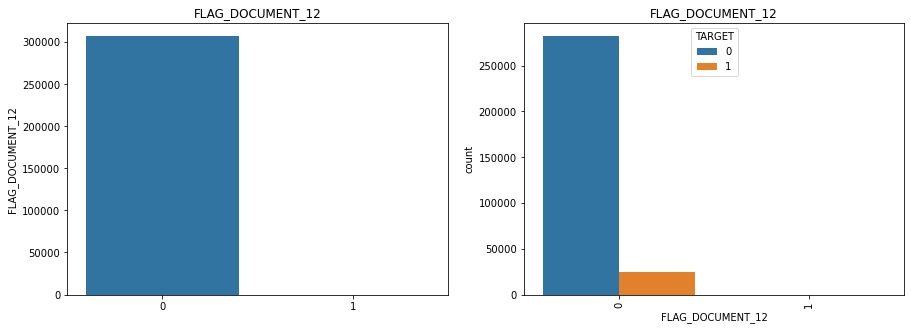

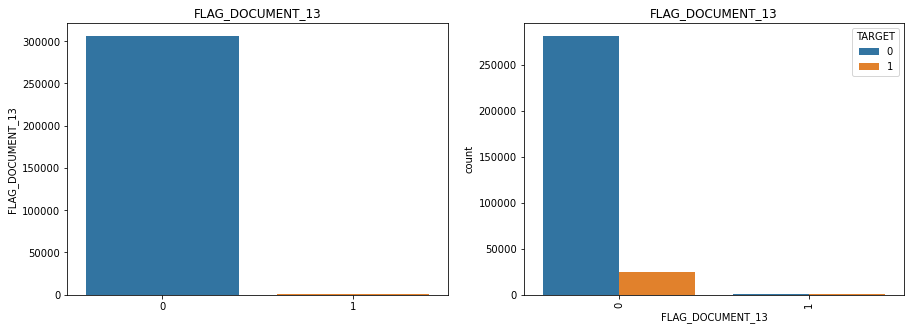

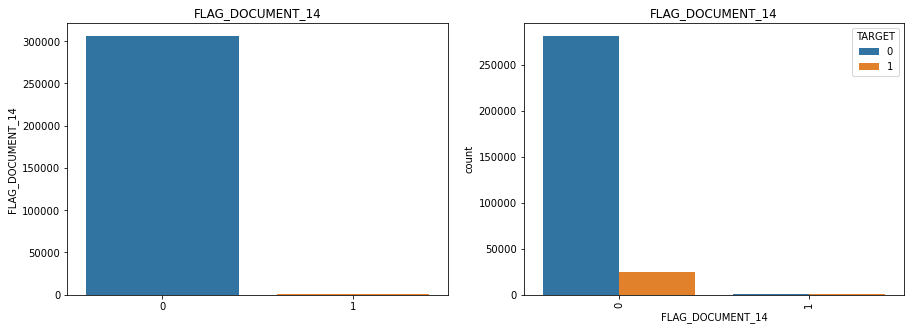

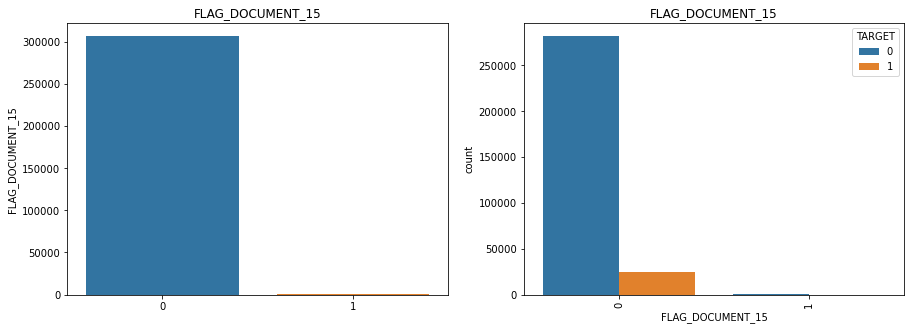

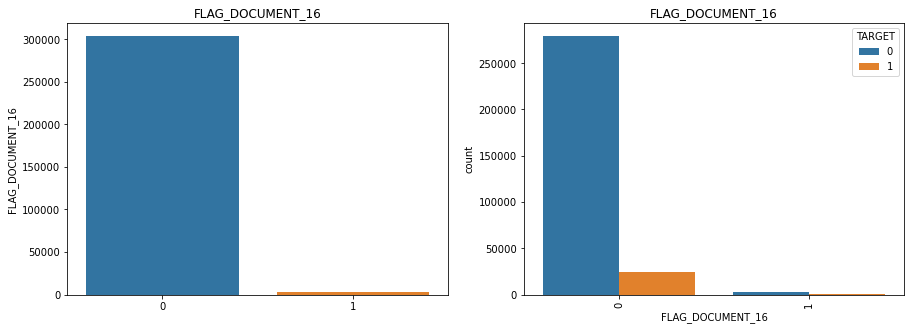

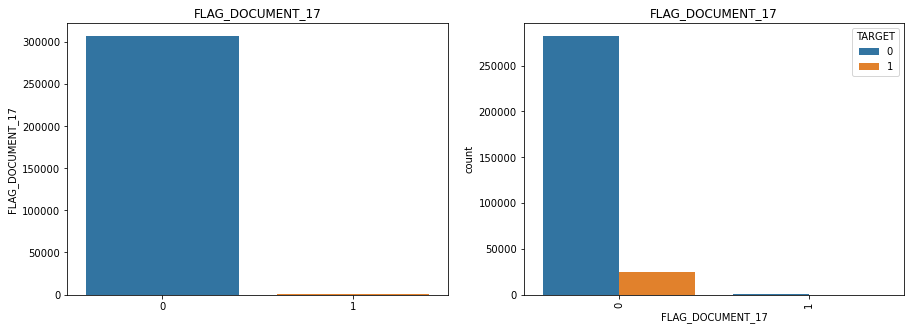

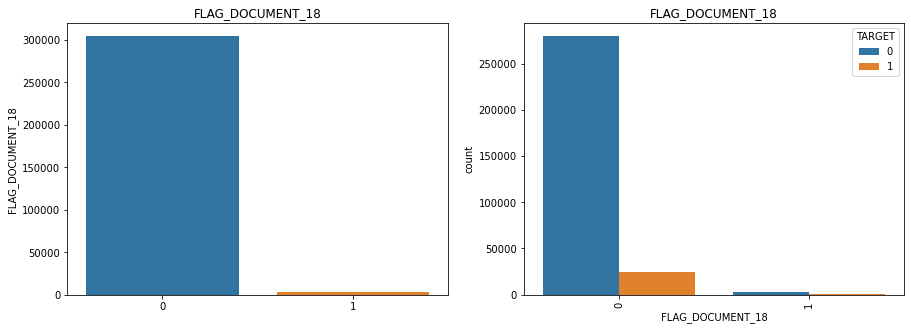

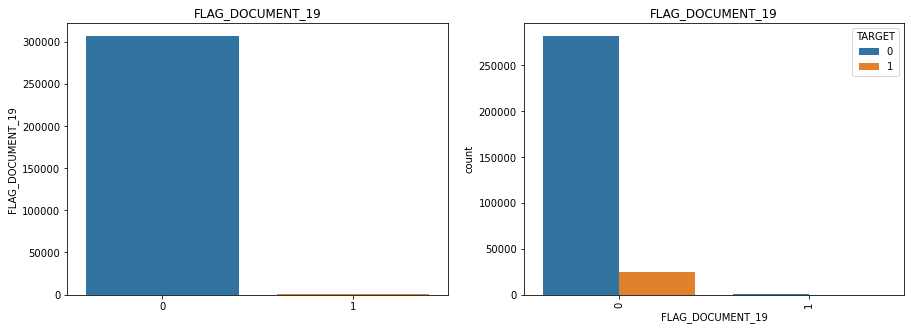

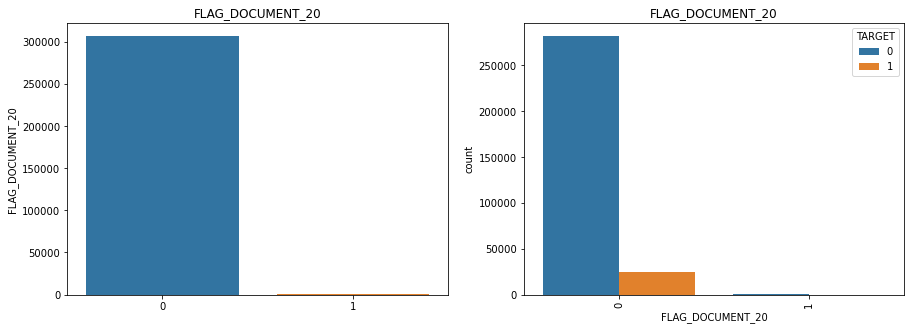

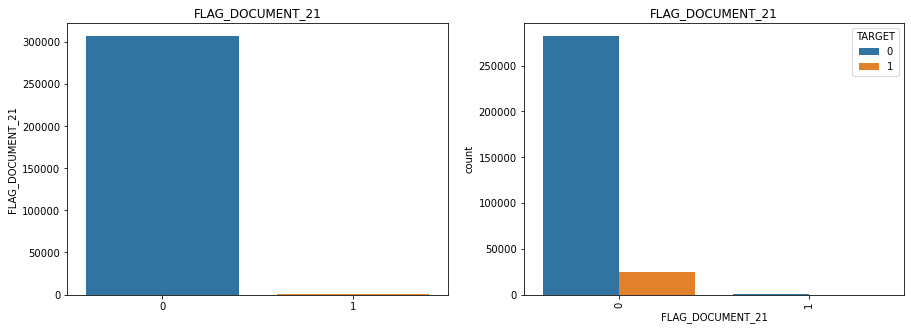

In [8]:
num_col2 = ['FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
for i in range(len(num_col2)):
    ax = EDA().category_visualisation(appli_train,num_col2[i],1,2,'TARGET' )   

Je vais conserver uniquement 'FLAG_DOCUMENT_3'

In [2]:
list_time_name = ['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

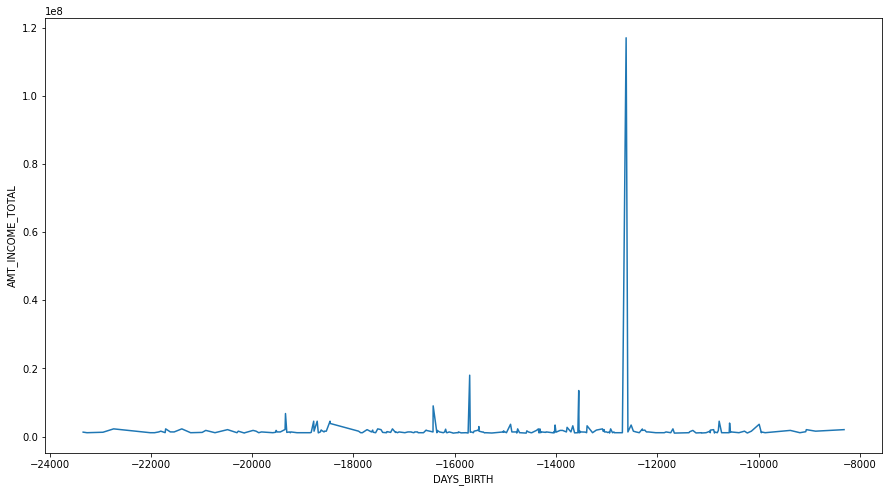

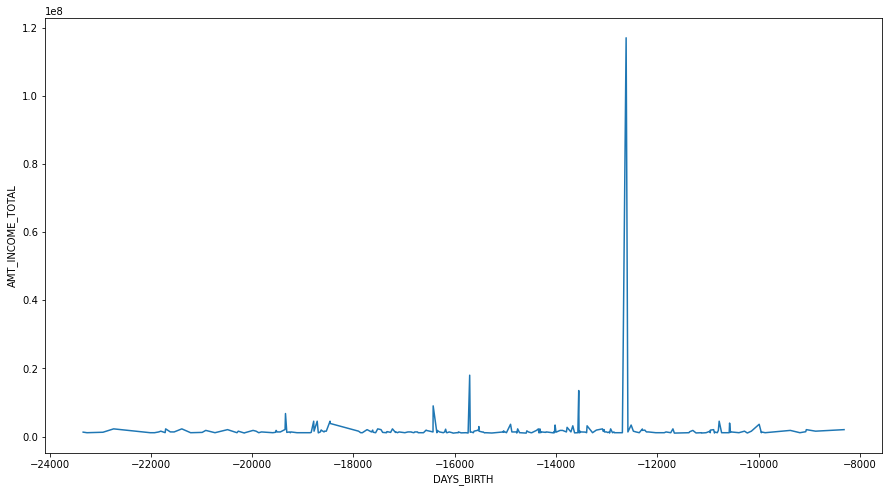

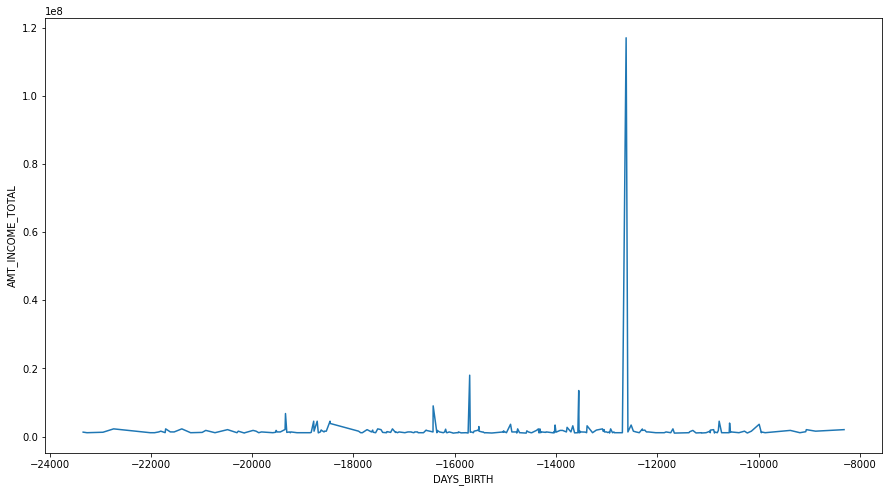

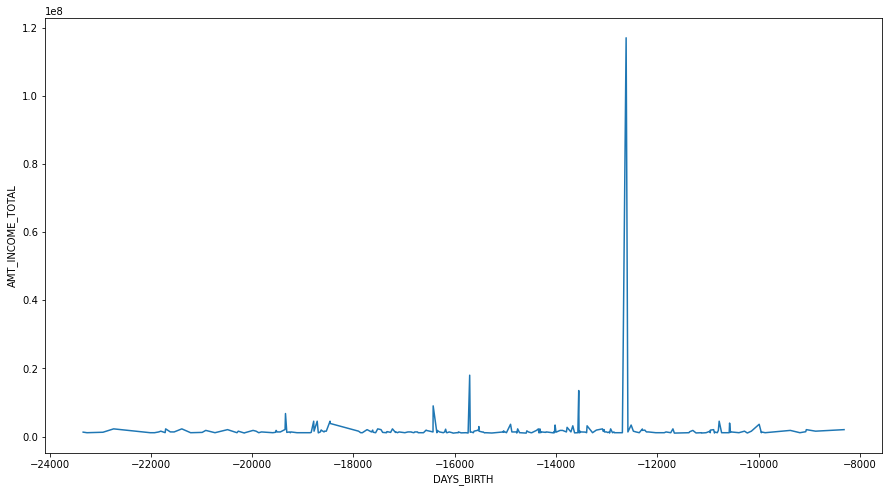

In [13]:
for i in range(len(list_time_name)):
    plt.figure(figsize = (15,8))
    sns.lineplot(x = 'DAYS_BIRTH', y = 'AMT_INCOME_TOTAL', data = appli_train[appli_train['AMT_INCOME_TOTAL']> 1000000])

**BUREAU et Bureau_BALANCE**

In [15]:
num_bur, categ_bur = EDA().categ_numeric_features(bureau)

bureau: number of numeric variable is 14 and number of categoric variable is 3


In [16]:
num_bur_bal, categ_bur_bal = EDA().categ_numeric_features(bureau_balance)

bureau_balance: number of numeric variable is 2 and number of categoric variable is 1


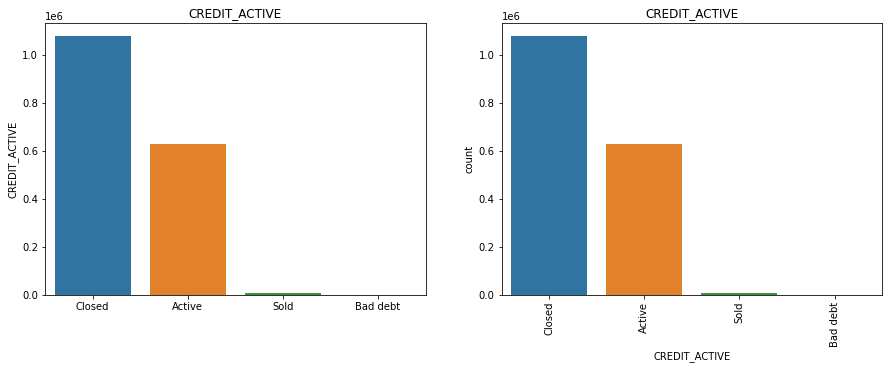

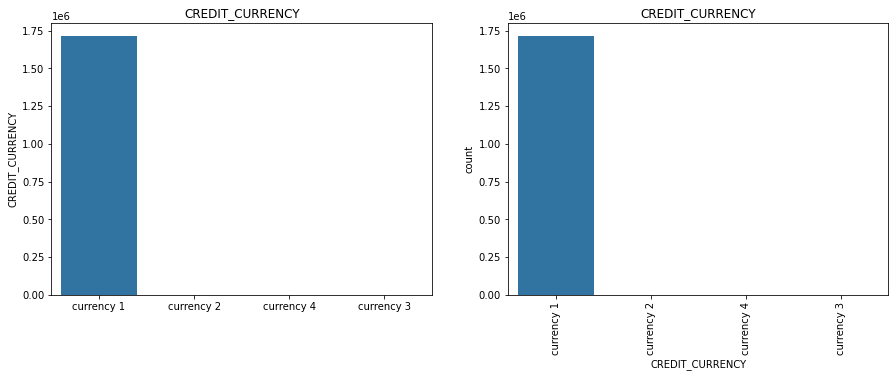

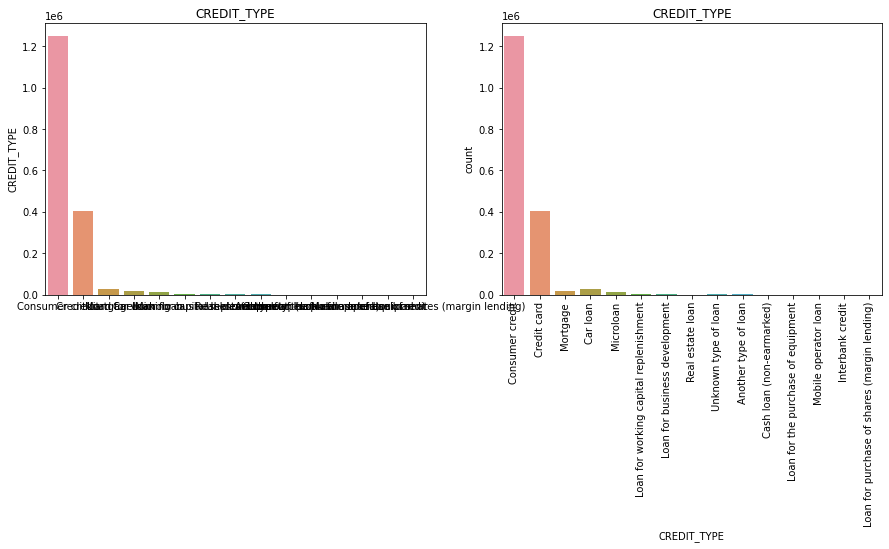

In [20]:
for i in range(len(categ_bur)):
    ax = EDA().category_visualisation(bureau,categ_bur[i],1,2,None)

CREDIT_CURRENCY il n'y a qu'une seule catégorie les autres sont vide. On ne garde CREDIT_CURRENCY_1

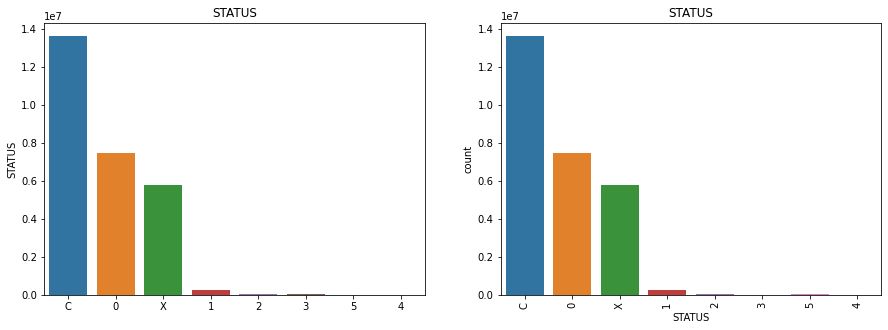

In [22]:
for i in range(len(categ_bur_bal)):
    ax = EDA().category_visualisation(bureau_balance,categ_bur_bal[i],1,2,None)

In [32]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

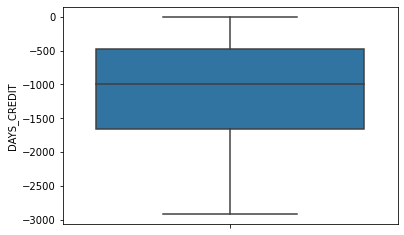

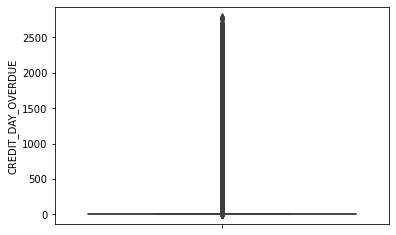

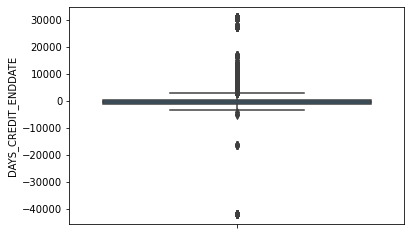

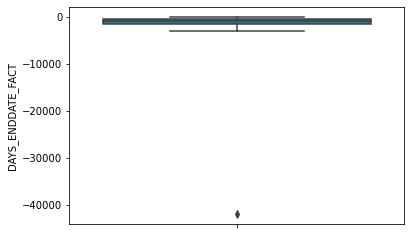

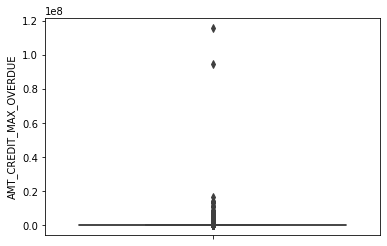

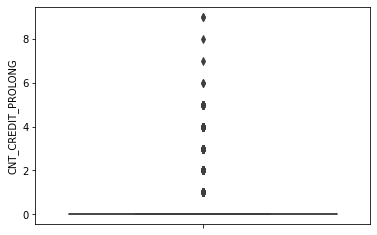

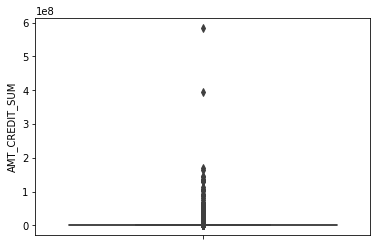

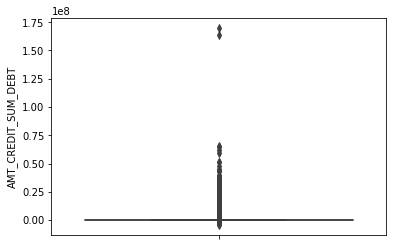

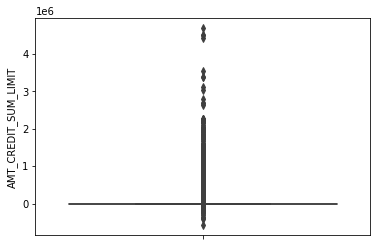

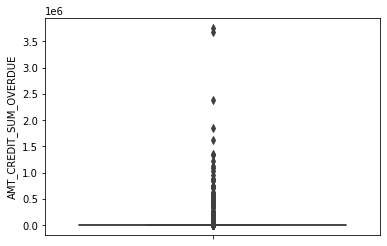

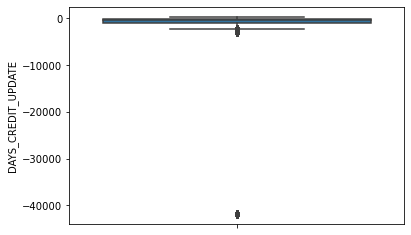

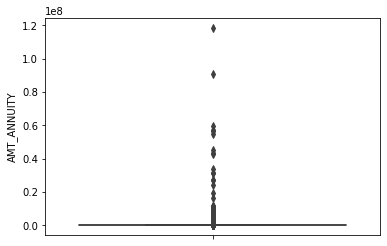

In [39]:
Bureau_col = [
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY']
for i in range(len(Bureau_col)):
    
    plt.show(sns.boxplot(y = bureau[Bureau_col[i]]))


In [41]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

<AxesSubplot:ylabel='MONTHS_BALANCE'>

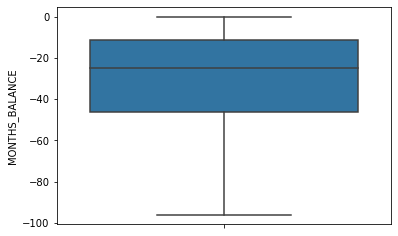

In [43]:
sns.boxplot(y = bureau_balance['MONTHS_BALANCE'])

**previous_application**

In [45]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [53]:
list_prev_app = [ 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

In [49]:
num_prev_appl, categ_prev_appl = EDA().categ_numeric_features(previous_application)

previous_application: number of numeric variable is 21 and number of categoric variable is 16


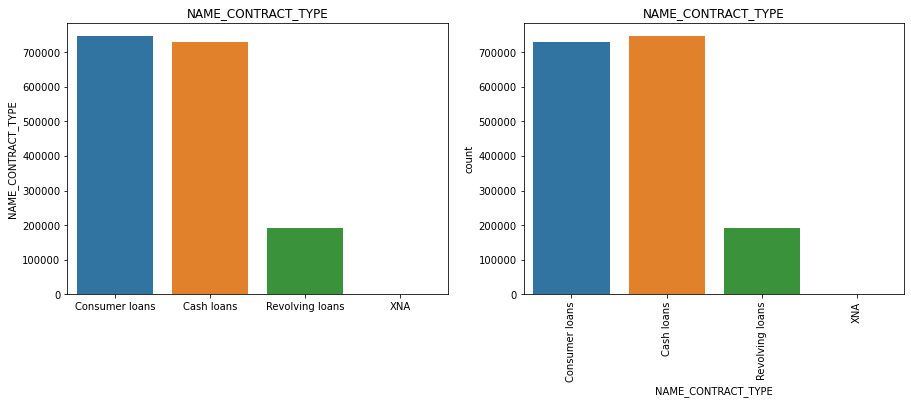

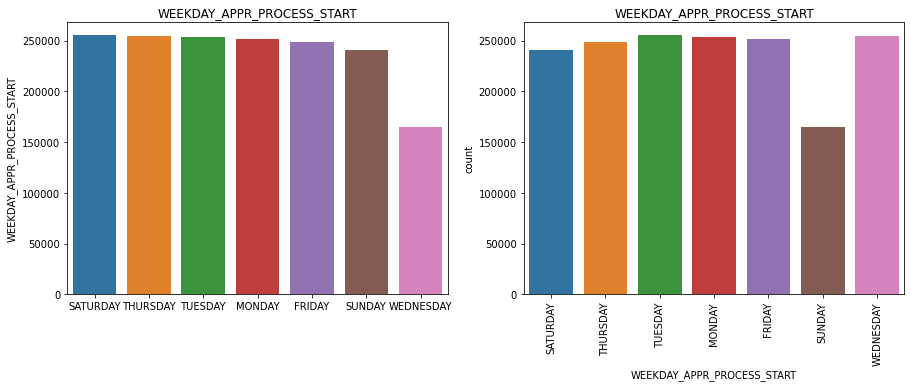

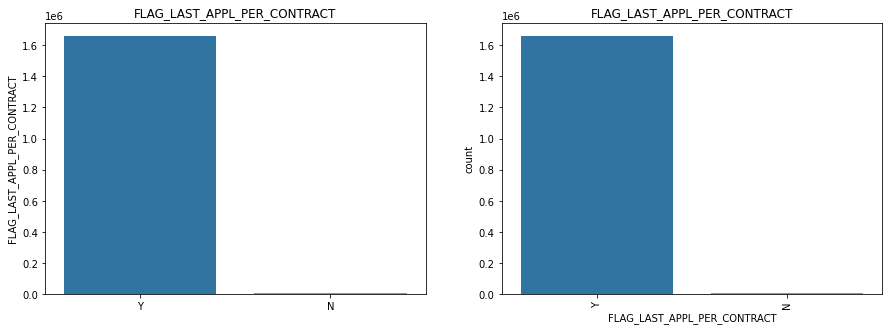

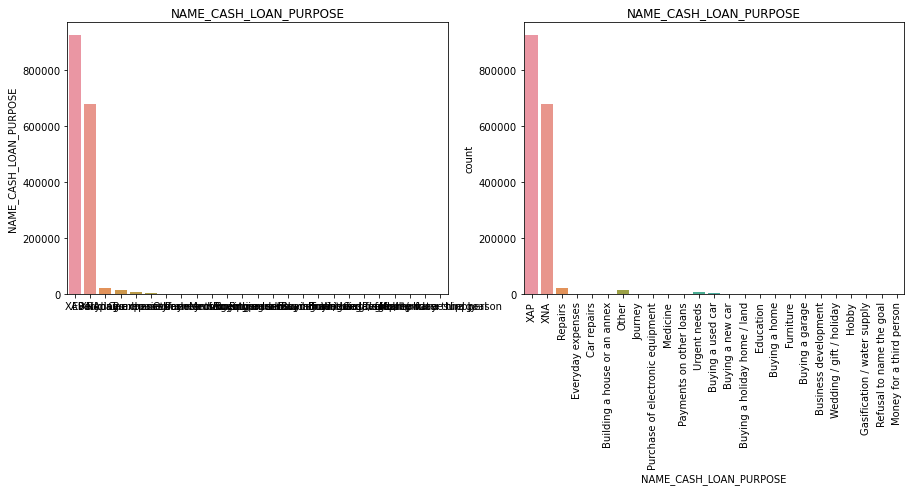

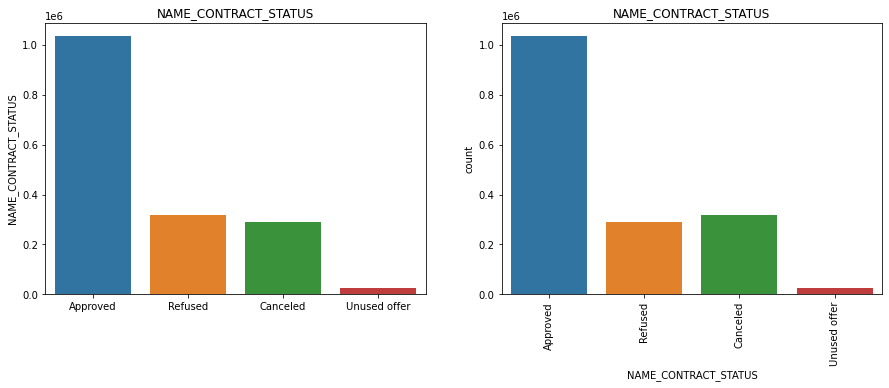

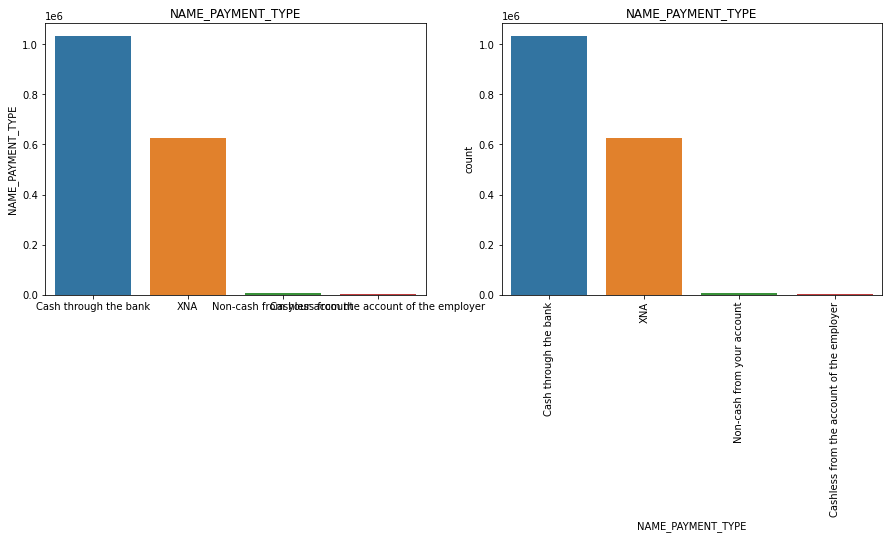

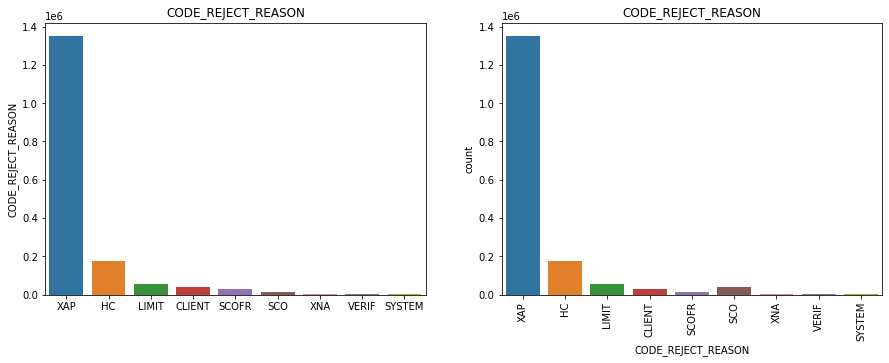

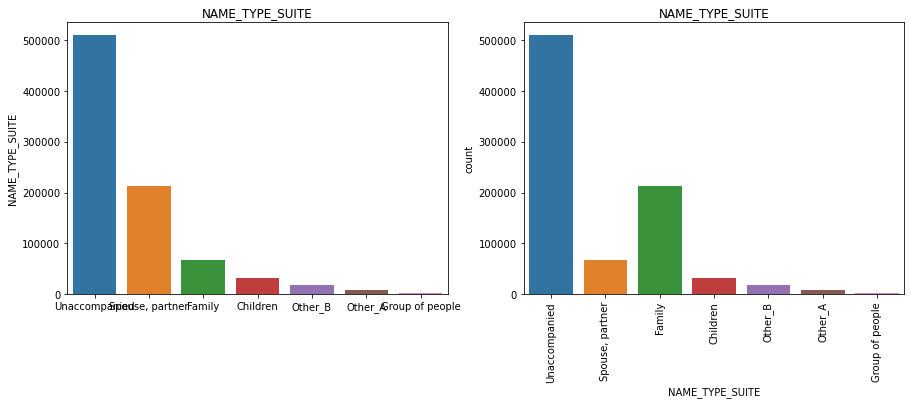

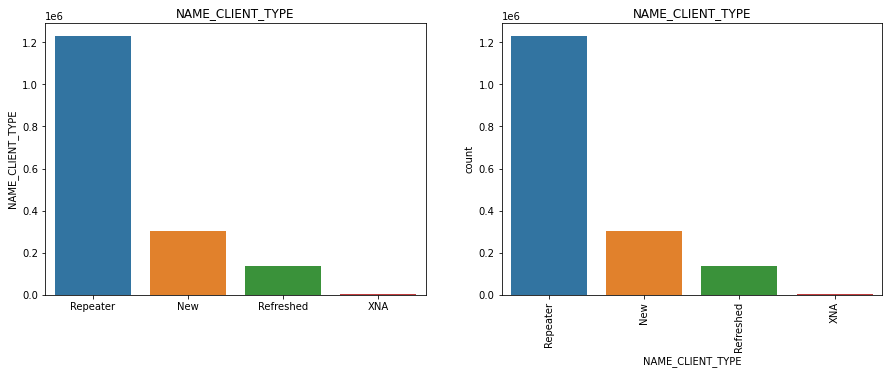

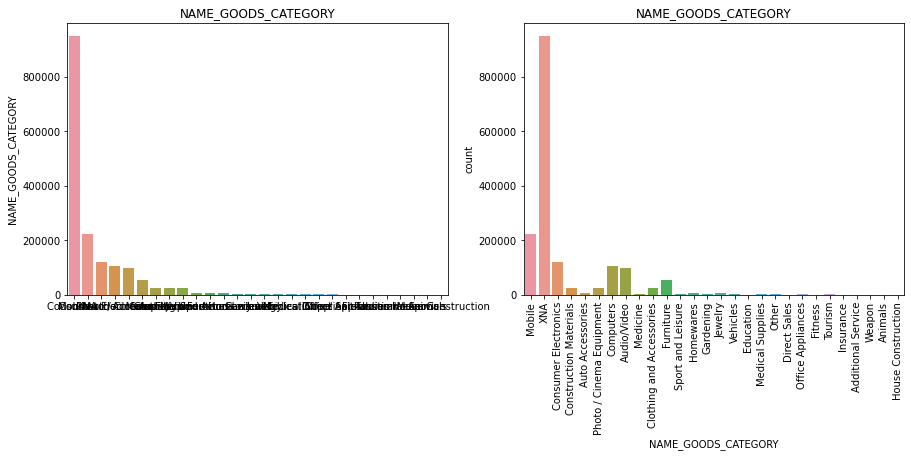

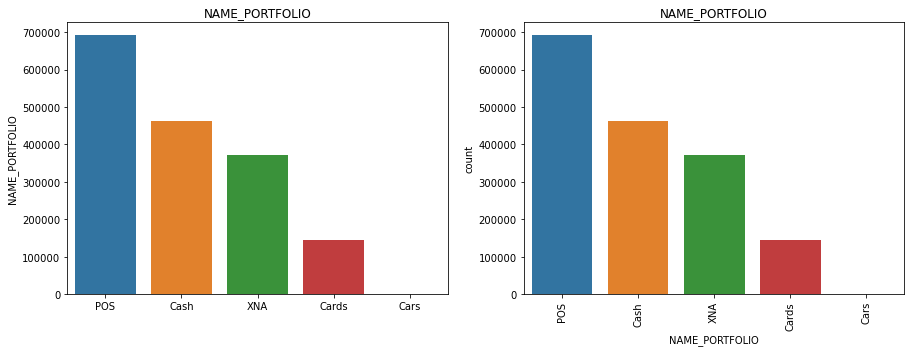

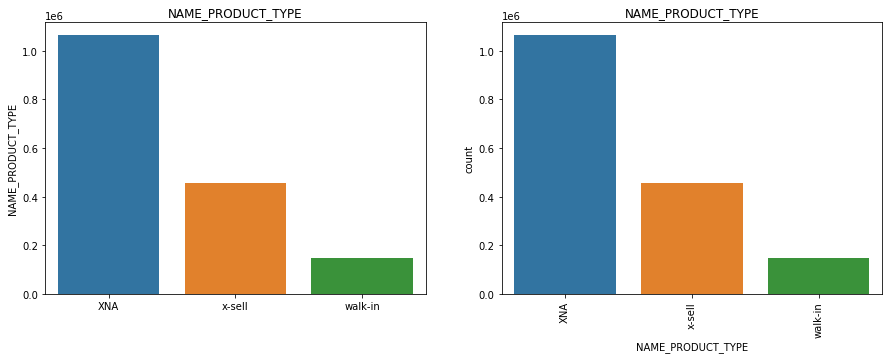

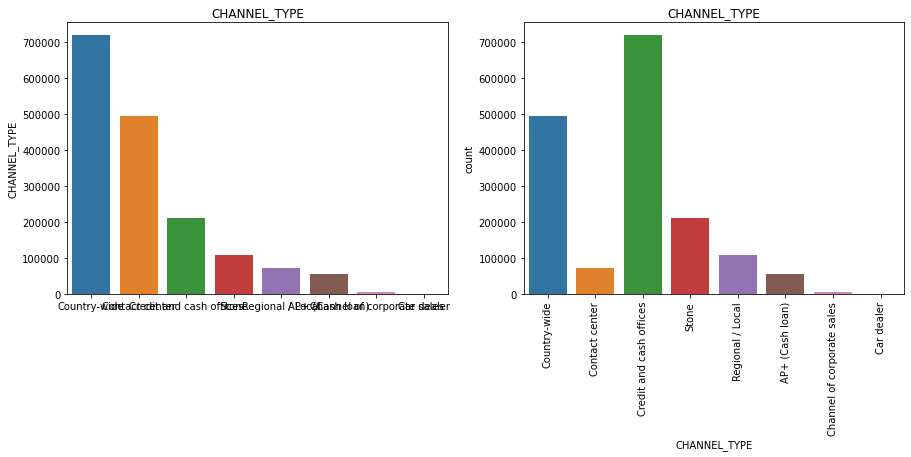

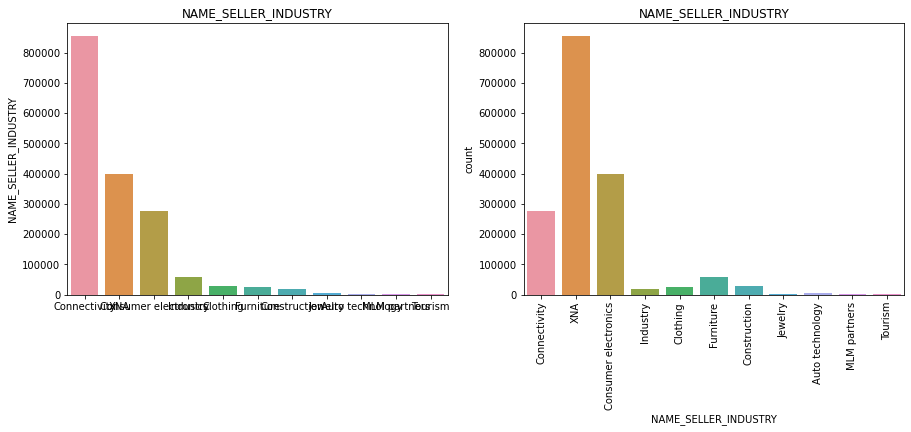

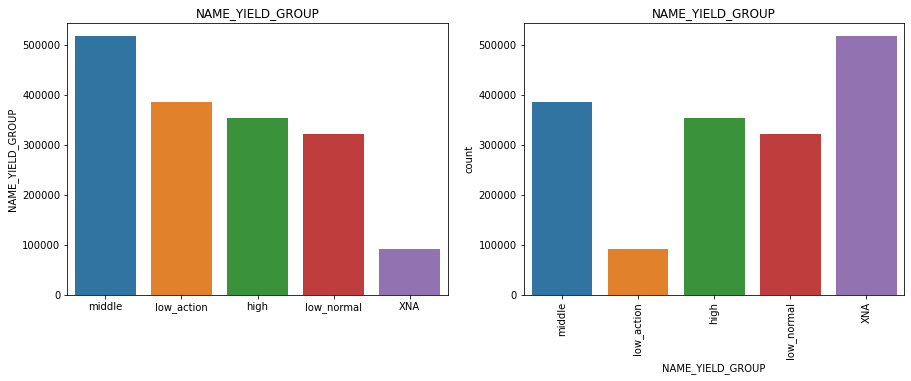

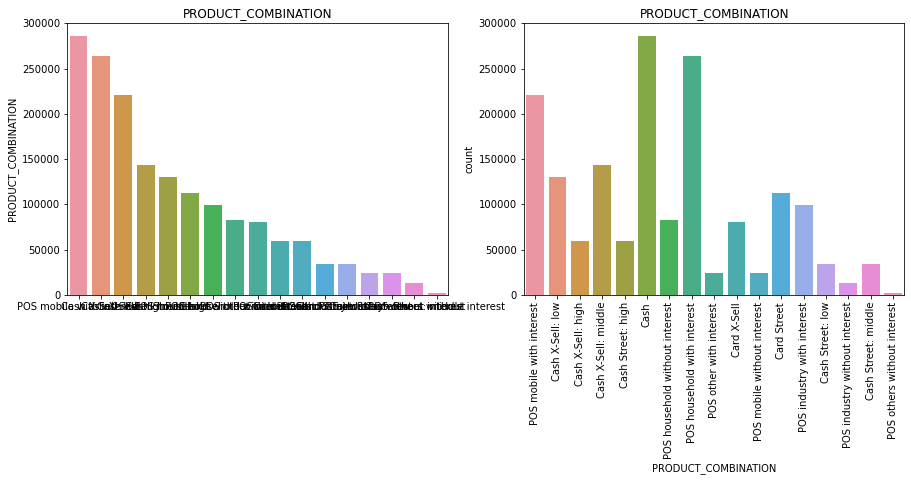

In [50]:
for i in range(len(categ_prev_appl)):
    ax = EDA().category_visualisation(previous_application,categ_prev_appl[i],1,2,None)

In [16]:
import plotly.express as px

In [19]:
data_test_age 

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [22]:
data_test_age = appli_test['CODE_GENDER'].value_counts()
fig = px.pie(appli_test, values=['F','M'], names=['Femmes','Hommes'], title='Répartition des clients par genre')

fig.show()

### Analyse bivariée

<Figure size 504x504 with 0 Axes>

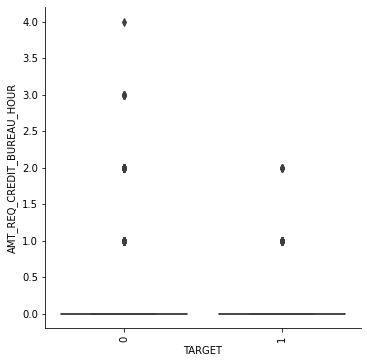

<Figure size 504x504 with 0 Axes>

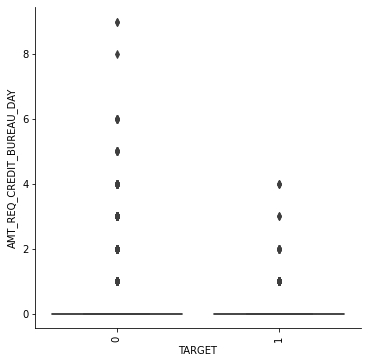

<Figure size 504x504 with 0 Axes>

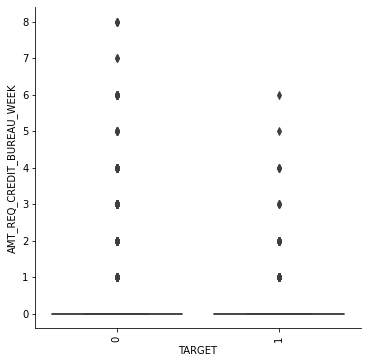

<Figure size 504x504 with 0 Axes>

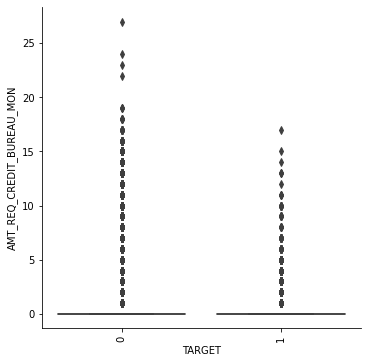

<Figure size 504x504 with 0 Axes>

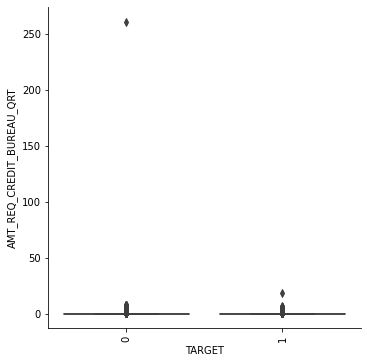

<Figure size 504x504 with 0 Axes>

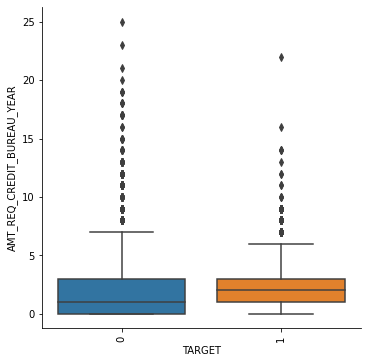

In [25]:
for i in range(len(num_col)):
    axe4 = EDA().bivariate_analysis(appli_train, 'TARGET', num_col[i], None)

<Figure size 504x504 with 0 Axes>

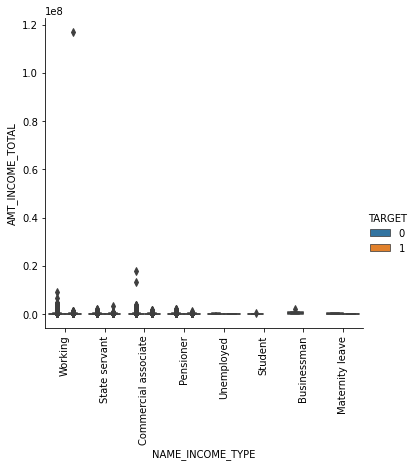

In [26]:
axe9 = EDA().bivariate_analysis(appli_train,'NAME_INCOME_TYPE','AMT_INCOME_TOTAL', 'TARGET')

**Relation entre quelques variables caractéristiques continue et la target 0 ou 1 selon si il rembourse ou non le prêt :**
- AMT_income_total : Outliers possibles dans la catégorie 1, Les personnes dans la catégories 1 gagnent moins que les personnes dans la catégorie 0
- AMT_CREDIT : la majorité ont un crédit supérieur à 500000 € 
- AMT_GOODS_PRICE : Les prix des biens est indépendant du remboursement ou non du prêt et la plupart des prix sont superieur à  500000 €
- Ext_source_1 :
- EXT_source_2 :
- EXT_source_3 :

<Figure size 504x504 with 0 Axes>

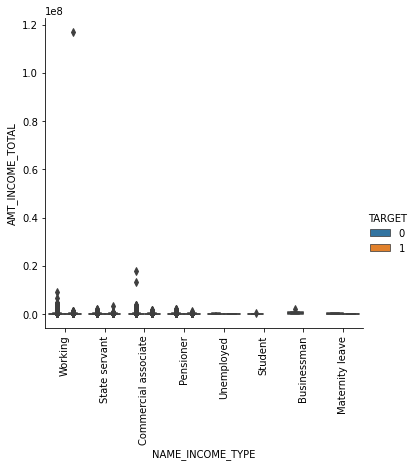

In [86]:
axe9 = EDA().bivariate_analysis(appli_test,'NAME_INCOME_TYPE','AMT_INCOME_TOTAL', 'TARGET')

<Figure size 504x504 with 0 Axes>

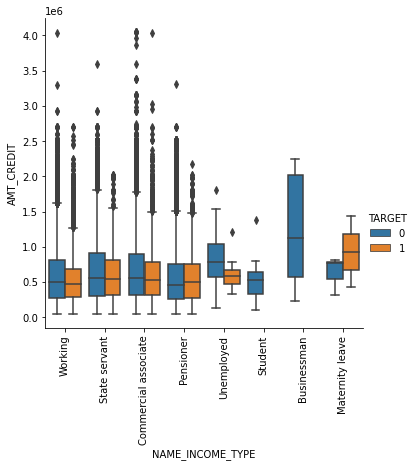

In [27]:
axe9 = EDA().bivariate_analysis(appli_train,'NAME_INCOME_TYPE','AMT_CREDIT', 'TARGET')

<Figure size 504x504 with 0 Axes>

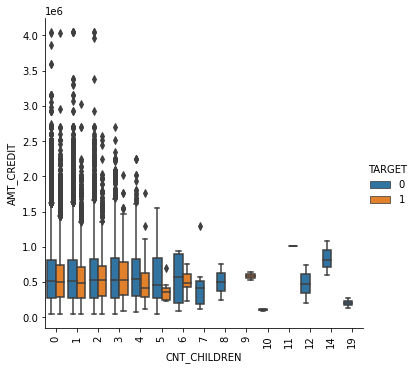

In [28]:
axe9 = EDA().bivariate_analysis(appli_train,'CNT_CHILDREN','AMT_CREDIT', 'TARGET')

<Figure size 504x504 with 0 Axes>

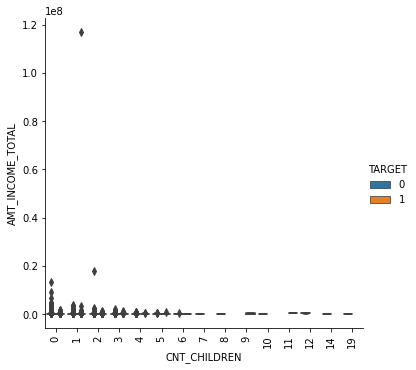

In [29]:
axe9 = EDA().bivariate_analysis(appli_train,'CNT_CHILDREN','AMT_INCOME_TOTAL', 'TARGET')

<Figure size 504x504 with 0 Axes>

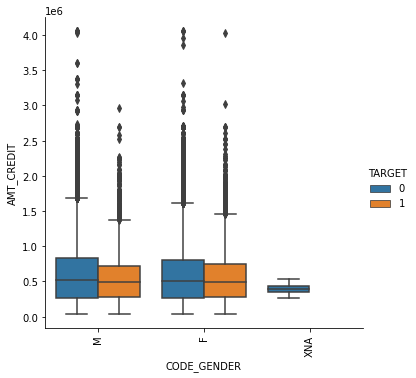

In [30]:
axe9 = EDA().bivariate_analysis(appli_train,'CODE_GENDER','AMT_CREDIT', 'TARGET')

### Analyse multivariée

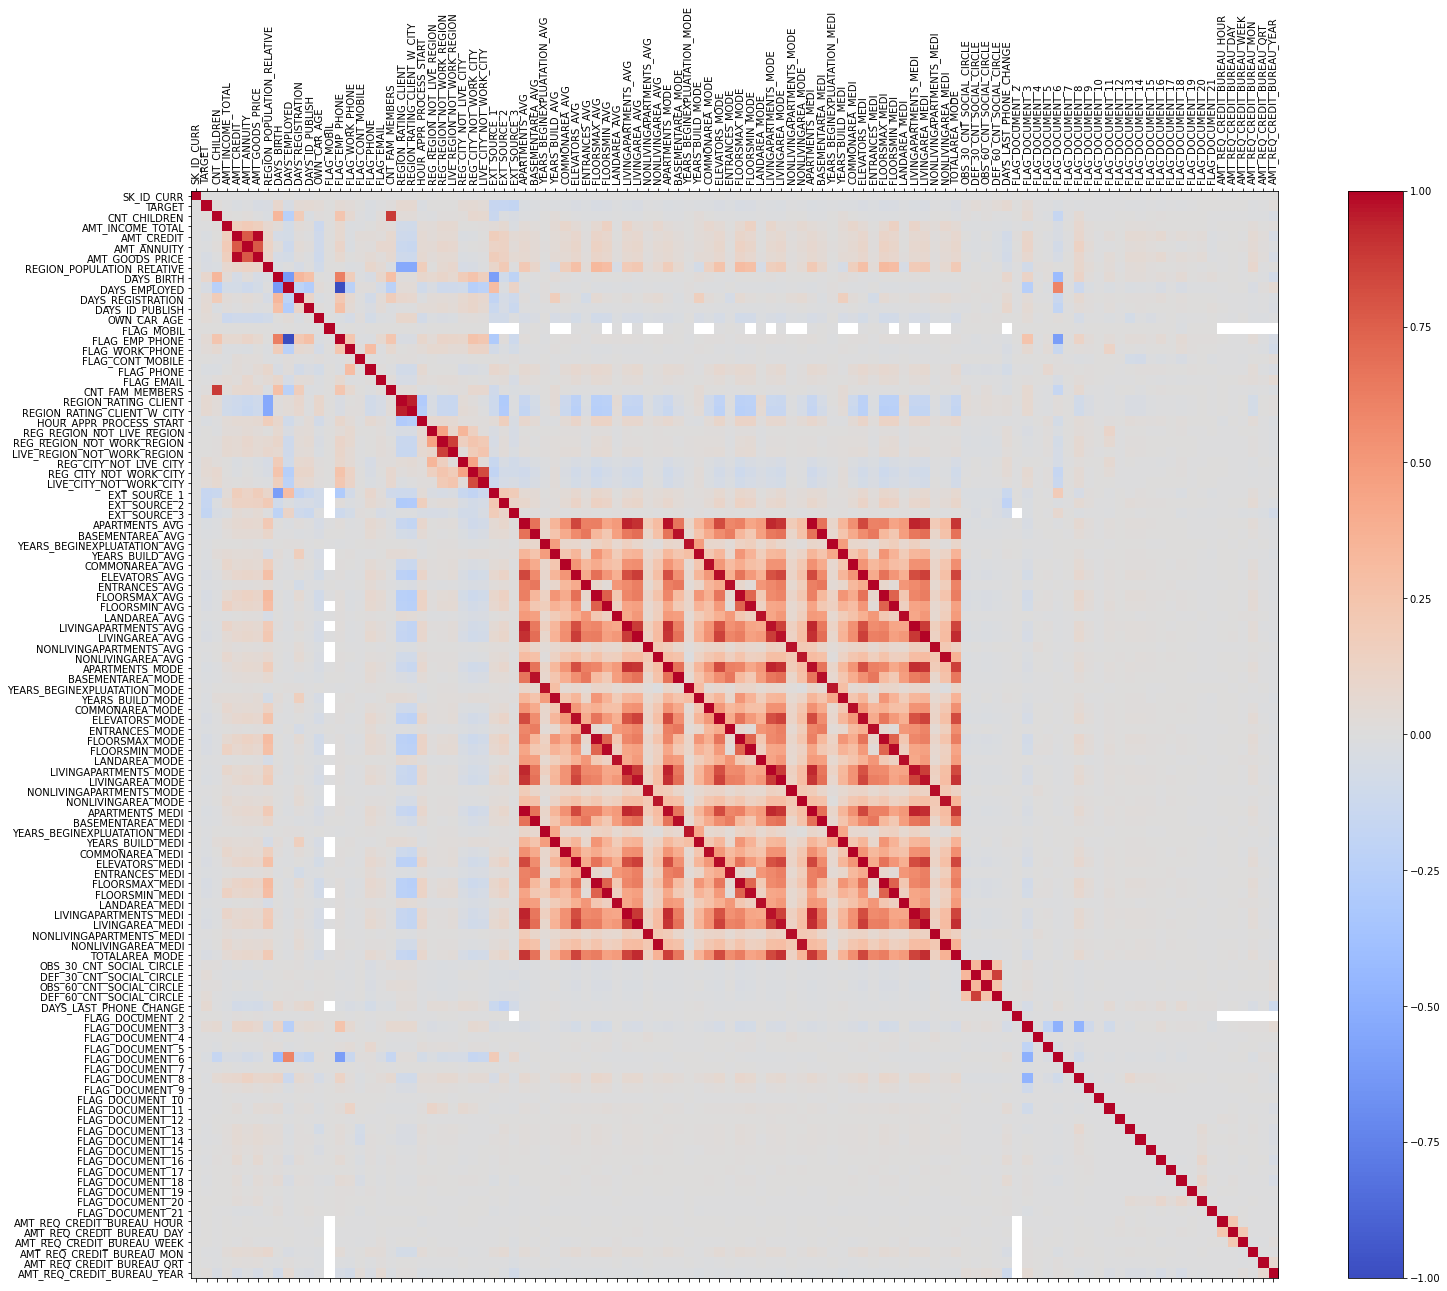

In [76]:
EDA().correlation_heatmap(appli_train,25,20)

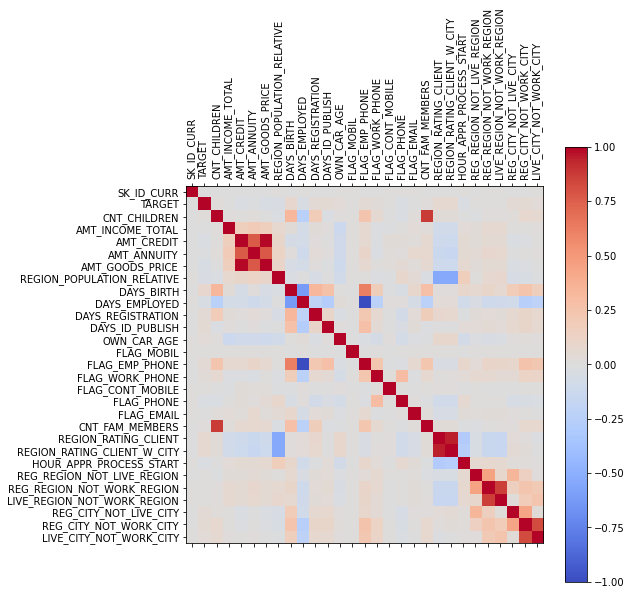

In [77]:
EDA().correlation_heatmap(appli_train.iloc[:,:40], 8,8)

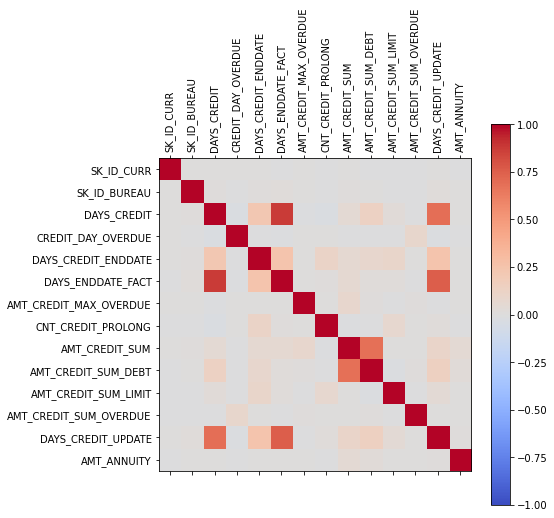

In [79]:
EDA().correlation_heatmap(bureau, 7, 7)

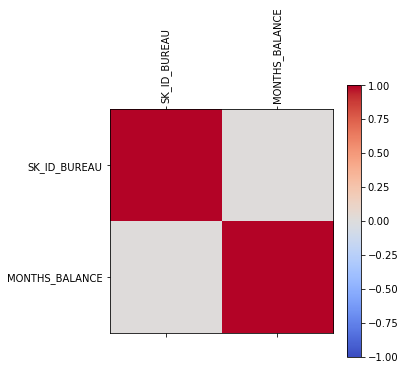

In [80]:
EDA().correlation_heatmap(bureau_balance,5,5)

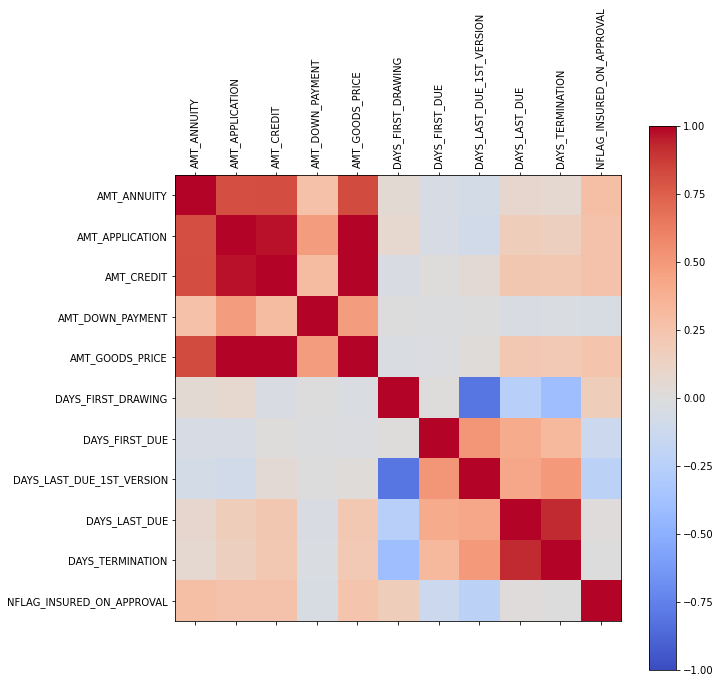

In [56]:
EDA().correlation_heatmap(previous_application[list_prev_app],10,10)

### Valeurs manquantes

In [35]:
miss_value_train = eda.missing_values_table(appli_train)
miss_value_train

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [36]:
miss_value_test = eda.missing_values_table(appli_test)
miss_value_test

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [37]:
miss_value_bureau = eda.missing_values_table(bureau)
miss_value_bureau

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [38]:
miss_value_credit_card_balance = eda.missing_values_table(credit_card_balance)
miss_value_credit_card_balance

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [39]:
miss_value_installments_payments = eda.missing_values_table(installments_payments)
miss_value_installments_payments

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


In [40]:
miss_value_POS_CASH_balance = eda.missing_values_table(POS_CASH_balance)
miss_value_POS_CASH_balance

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [41]:
miss_value_previous_application = eda.missing_values_table(previous_application)
miss_value_previous_application

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [42]:
files_list_name

['appli_train',
 'appli_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'POS_CASH_balance',
 'previous_application']

In [43]:
for i in range(len(files_list_name)) :
    res = EDA().categ_numeric_features(files_list[i])

appli_train: number of numeric variable is 106 and number of categoric variable is 16
appli_test: number of numeric variable is 105 and number of categoric variable is 16
bureau: number of numeric variable is 14 and number of categoric variable is 3
bureau_balance: number of numeric variable is 2 and number of categoric variable is 1
credit_card_balance: number of numeric variable is 22 and number of categoric variable is 1
installments_payments: number of numeric variable is 8 and number of categoric variable is 0
POS_CASH_balance: number of numeric variable is 7 and number of categoric variable is 1
previous_application: number of numeric variable is 21 and number of categoric variable is 16
